#Importing libraries and Dataset

In [100]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [102]:
!pip3 install -U ucimlrepo

In [103]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

In [104]:
metro_interstate = fetch_ucirepo(id=492)

In [105]:
print(metro_interstate.metadata)

{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

In [106]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/492/data.csv')

#Dataset Cleaning (prep)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [108]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [109]:
df.describe(include='all')

holiday          temp       rain_1h       snow_1h    clouds_all  \
count          61  48204.000000  48204.000000  48204.000000  48204.000000   
unique         11           NaN           NaN           NaN           NaN   
top     Labor Day           NaN           NaN           NaN           NaN   
freq            7           NaN           NaN           NaN           NaN   
mean          NaN    281.205870      0.334264      0.000222     49.362231   
std           NaN     13.338232     44.789133      0.008168     39.015750   
min           NaN      0.000000      0.000000      0.000000      0.000000   
25%           NaN    272.160000      0.000000      0.000000      1.000000   
50%           NaN    282.450000      0.000000      0.000000     64.000000   
75%           NaN    291.806000      0.000000      0.000000     90.000000   
max           NaN    310.070000   9831.300000      0.510000    100.000000   

       weather_main weather_description            date_time  traffic_volume  
count         48204               48204                48204    48204.000000  
unique           11                  38                40575             NaN  
top          Clouds        sky is clear  2013-05-19 10:00:00             NaN  
freq          15164               11665                    6             NaN  
mean            NaN                 NaN                  NaN     3259.818355  
std             NaN                 NaN                  NaN     1986.860670  
min             NaN                 NaN                  NaN        0.000000  
25%             NaN                 NaN                  NaN     1193.000000  
50%             NaN                 NaN                  NaN     3380.000000  
75%             NaN                 NaN                  NaN     4933.000000  
max             NaN                 NaN                  NaN     7280.000000

##Checking for Duplicates

In [110]:
df.duplicated().sum() #Checking for duplicates

17

In [111]:
df[df.duplicated()] #Calling duplicated rows

holiday     temp  rain_1h  snow_1h  clouds_all  weather_main  \
18697     NaN  286.290      0.0      0.0           1         Clear   
23851     NaN  289.060      0.0      0.0          90        Clouds   
26784     NaN  289.775      0.0      0.0          56        Clouds   
26980     NaN  287.860      0.0      0.0           0         Clear   
27171     NaN  279.287      0.0      0.0          56        Clouds   
28879     NaN  267.890      0.0      0.0          90          Snow   
29268     NaN  254.220      0.0      0.0           1         Clear   
34711     NaN  295.010      0.0      0.0          40        Clouds   
34967     NaN  292.840      0.0      0.0           1         Clear   
34969     NaN  294.520      0.0      0.0           1         Clear   
34971     NaN  295.770      0.0      0.0          75        Clouds   
34973     NaN  296.950      0.0      0.0           1  Thunderstorm   
37572     NaN  288.890      0.0      0.0           1         Clear   
38676     NaN  278.720      0.0      0.0          90       Drizzle   
38677     NaN  278.720      0.0      0.0          90          Mist   
39527     NaN  266.220      0.0      0.0           1         Clear   
48173     NaN  280.680      0.0      0.0          90        Clouds   

           weather_description            date_time  traffic_volume  
18697             sky is clear  2015-09-30 19:00:00            3679  
23851          overcast clouds  2016-06-01 10:00:00            4831  
26784            broken clouds  2016-09-21 15:00:00            5365  
26980             Sky is Clear  2016-09-29 19:00:00            3435  
27171            broken clouds  2016-10-07 18:00:00            4642  
28879               light snow  2016-12-06 18:00:00            4520  
29268             sky is clear  2016-12-19 00:00:00             420  
34711         scattered clouds  2017-06-21 11:00:00            4808  
34967             sky is clear  2017-06-30 10:00:00            4638  
34969             sky is clear  2017-06-30 11:00:00            4725  
34971            broken clouds  2017-06-30 12:00:00            5229  
34973             thunderstorm  2017-06-30 13:00:00            5263  
37572             sky is clear  2017-09-29 19:00:00            4498  
38676  light intensity drizzle  2017-11-05 01:00:00             629  
38677                     mist  2017-11-05 01:00:00             629  
39527             sky is clear  2017-12-05 18:00:00            3936  
48173          overcast clouds  2018-09-29 19:00:00            3818

In [112]:
df.drop_duplicates(inplace=True) #Dropping duplicates

##Checking for Null Values

In [113]:
df.isnull().sum()

holiday                48126
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [114]:
df['holiday'].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [115]:
df['holiday'] = df['holiday'].fillna('No Holiday')

In [116]:
df['holiday'].value_counts()

holiday
No Holiday                   48126
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: count, dtype: int64

In [117]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

##String Cleaning

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48187 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48187 non-null  object 
 1   temp                 48187 non-null  float64
 2   rain_1h              48187 non-null  float64
 3   snow_1h              48187 non-null  float64
 4   clouds_all           48187 non-null  int64  
 5   weather_main         48187 non-null  object 
 6   weather_description  48187 non-null  object 
 7   date_time            48187 non-null  object 
 8   traffic_volume       48187 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.7+ MB


In [119]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0  No Holiday  288.28      0.0      0.0          40       Clouds   
1  No Holiday  289.36      0.0      0.0          75       Clouds   
2  No Holiday  289.58      0.0      0.0          90       Clouds   
3  No Holiday  290.13      0.0      0.0          90       Clouds   
4  No Holiday  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [120]:
# Convert date_time column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour

In [121]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0  No Holiday  288.28      0.0      0.0          40       Clouds   
1  No Holiday  289.36      0.0      0.0          75       Clouds   
2  No Holiday  289.58      0.0      0.0          90       Clouds   
3  No Holiday  290.13      0.0      0.0          90       Clouds   
4  No Holiday  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  year  month  day  \
0    scattered clouds 2012-10-02 09:00:00            5545  2012     10    2   
1       broken clouds 2012-10-02 10:00:00            4516  2012     10    2   
2     overcast clouds 2012-10-02 11:00:00            4767  2012     10    2   
3     overcast clouds 2012-10-02 12:00:00            5026  2012     10    2   
4       broken clouds 2012-10-02 13:00:00            4918  2012     10    2   

   hour  
0     9  
1    10  
2    11  
3    12  
4    13

##Outlier detection and management

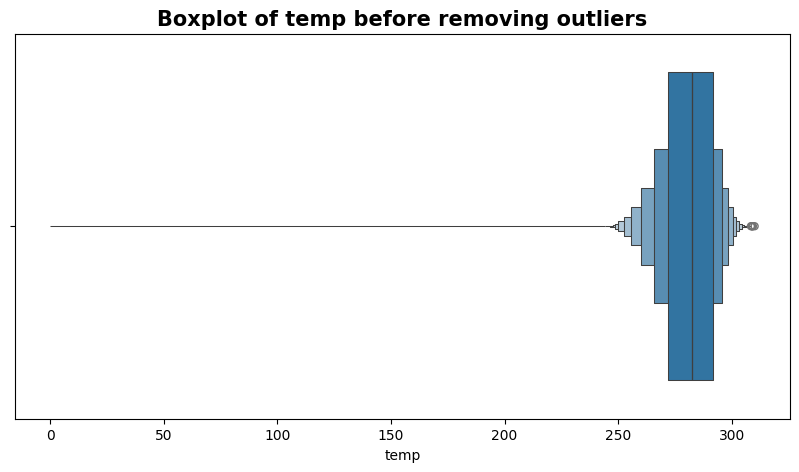

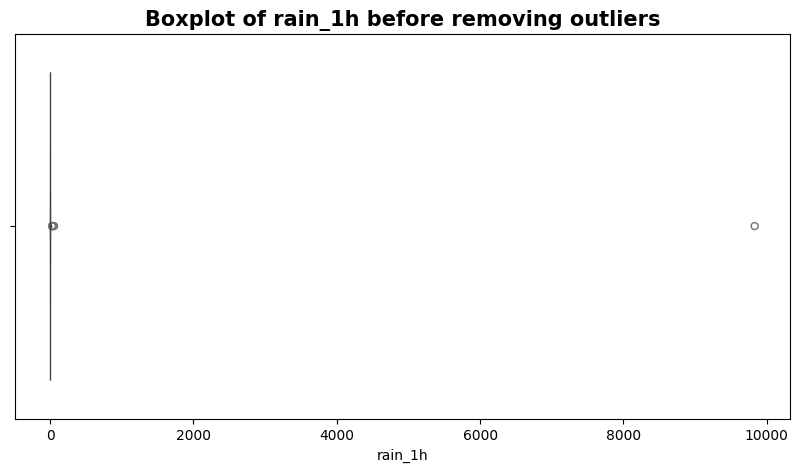

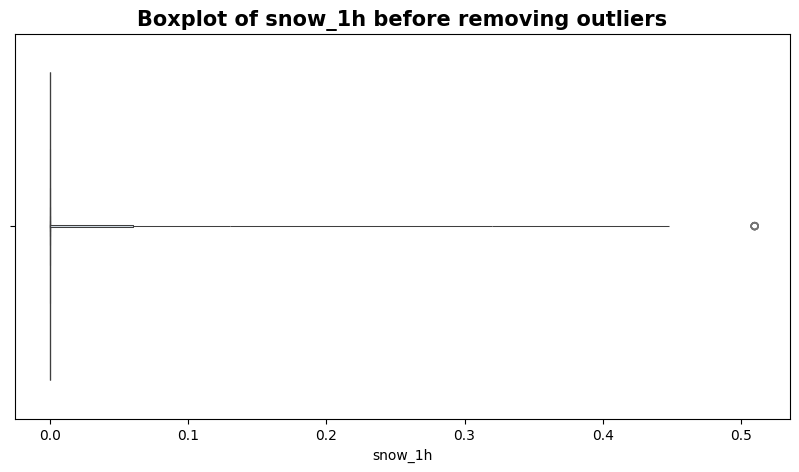

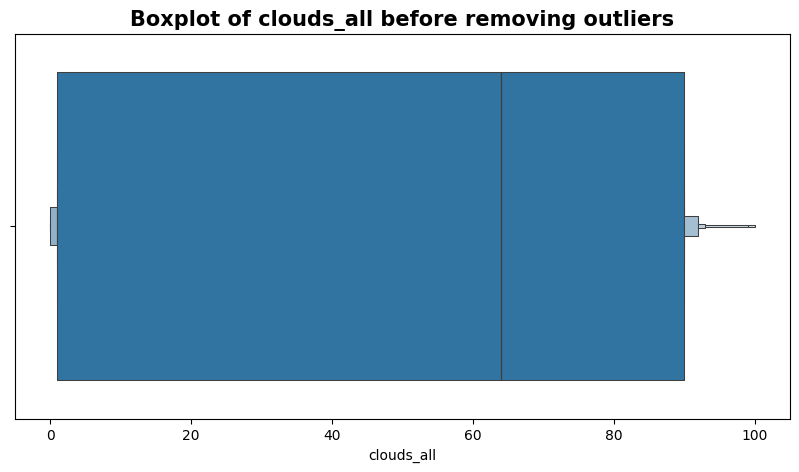

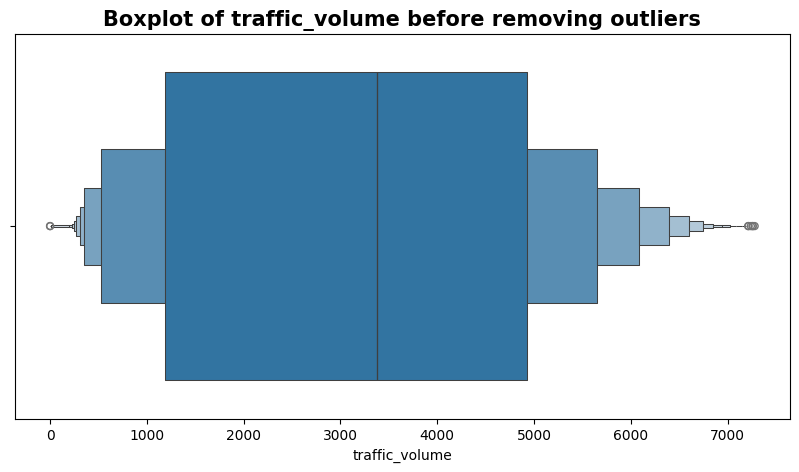

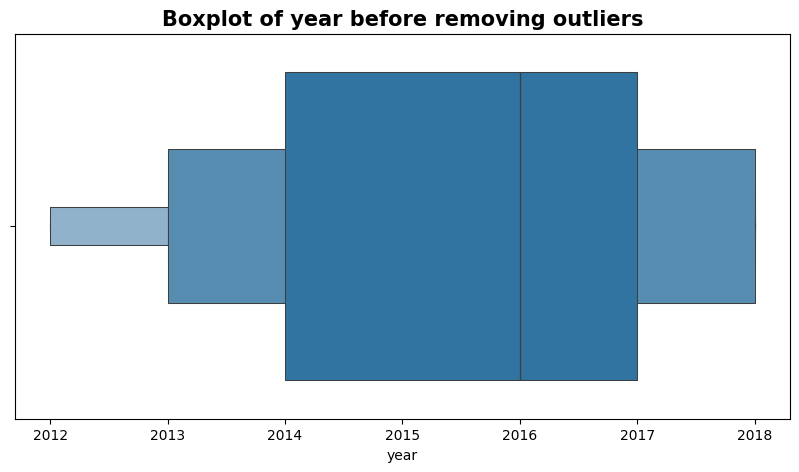

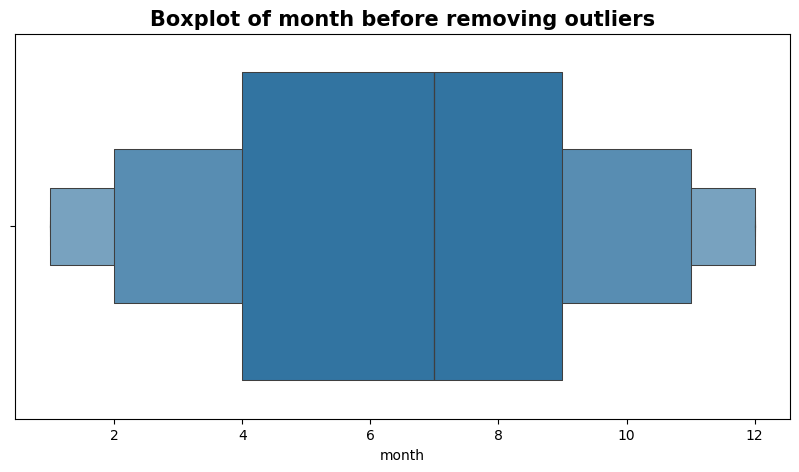

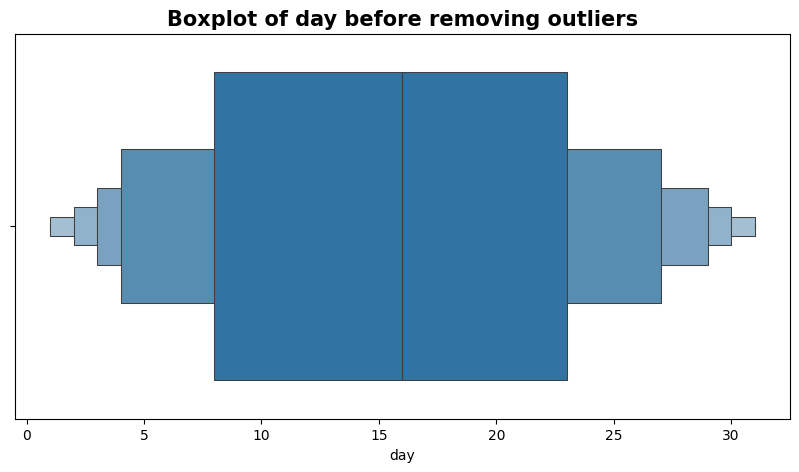

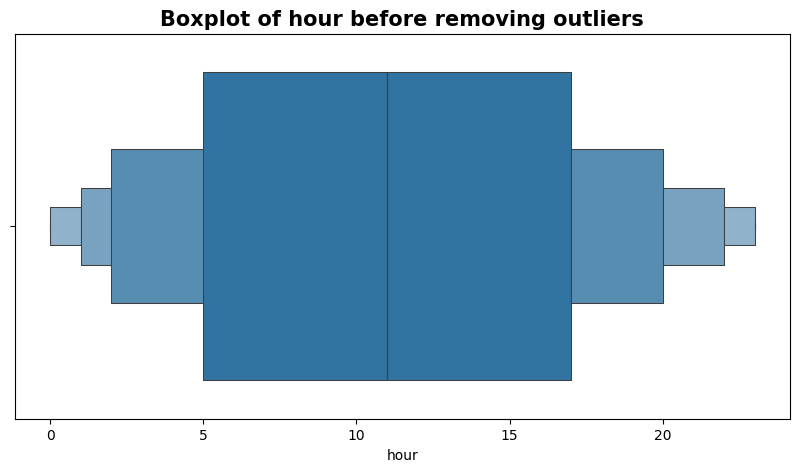

In [122]:
for feat in df.columns:
    if pd.api.types.is_numeric_dtype(df[feat]):
        plt.figure(figsize=(10,5))
        sns.boxenplot(x=df[feat])
        plt.title(f'Boxplot of {feat} before removing outliers', fontsize = 15, fontweight = 'bold')

In [123]:
from scipy import stats

In [124]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate the Z-scores, only for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Define a threshold
threshold = 3

# Get a boolean DataFrame where True indicates the presence of an outlier
outliers = (z_scores > threshold)

# Filter out the rows where any column has an outlier
df = df[(~outliers).all(axis=1)]

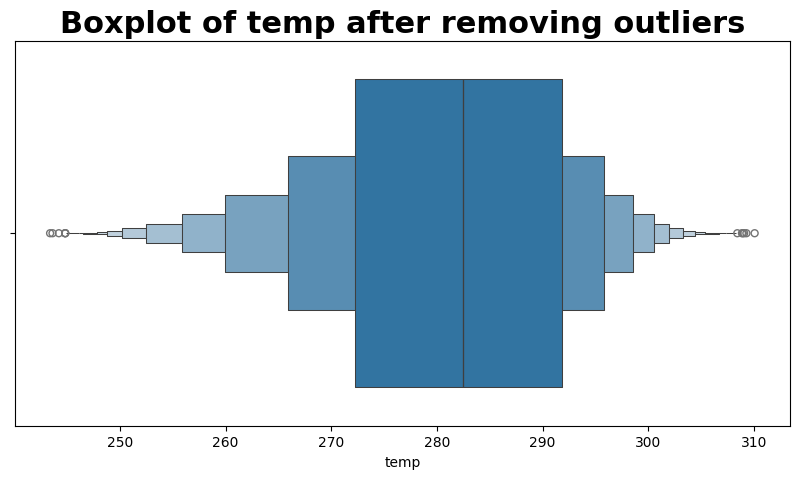

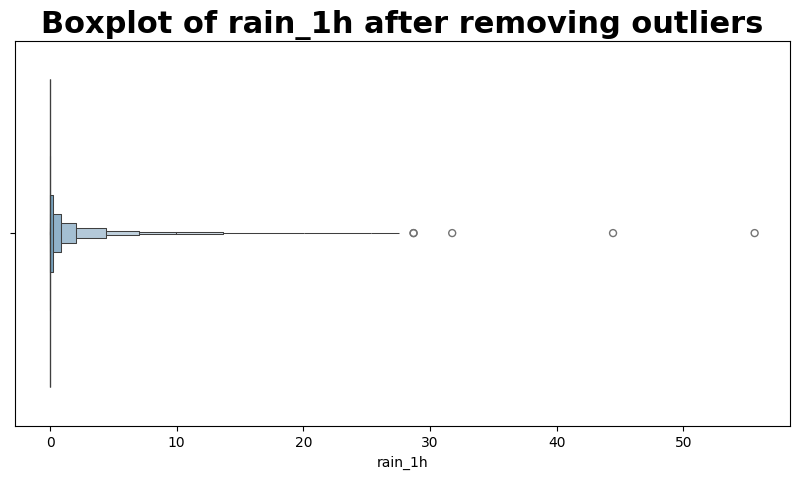

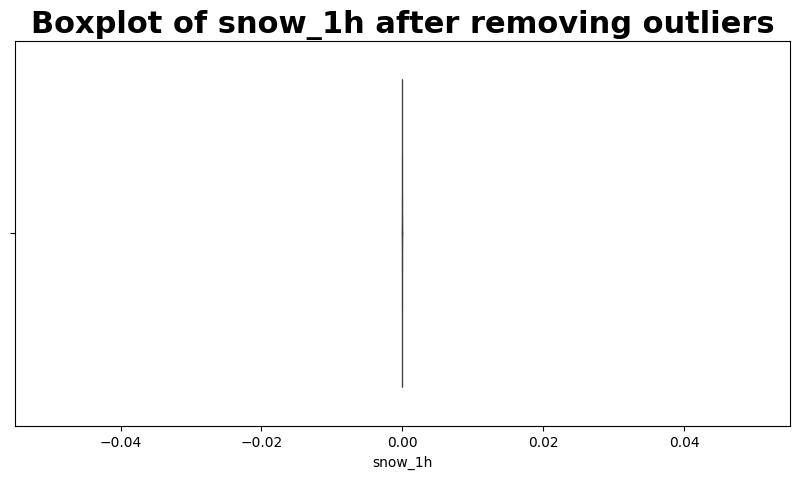

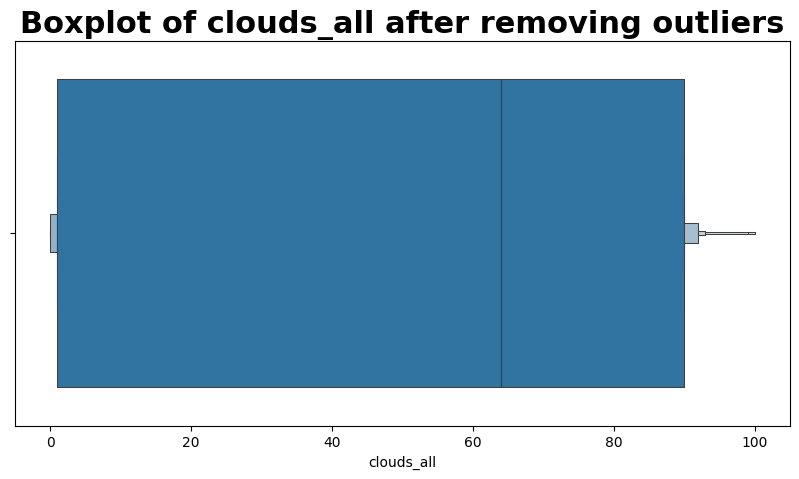

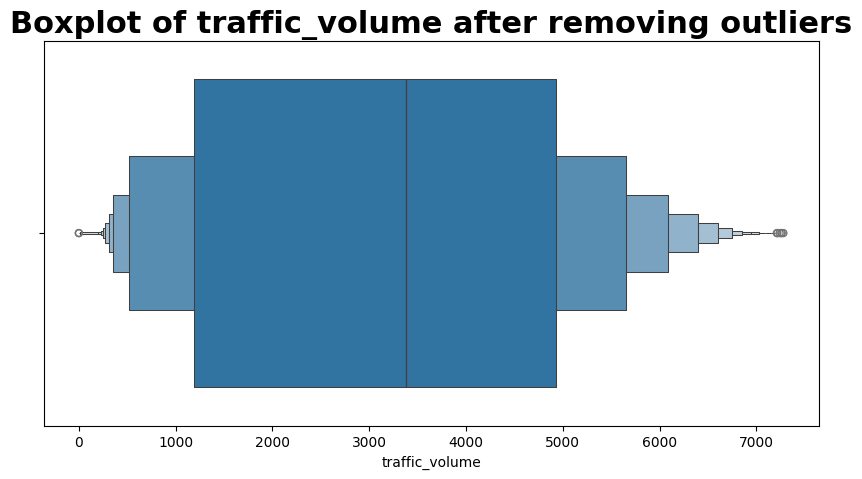

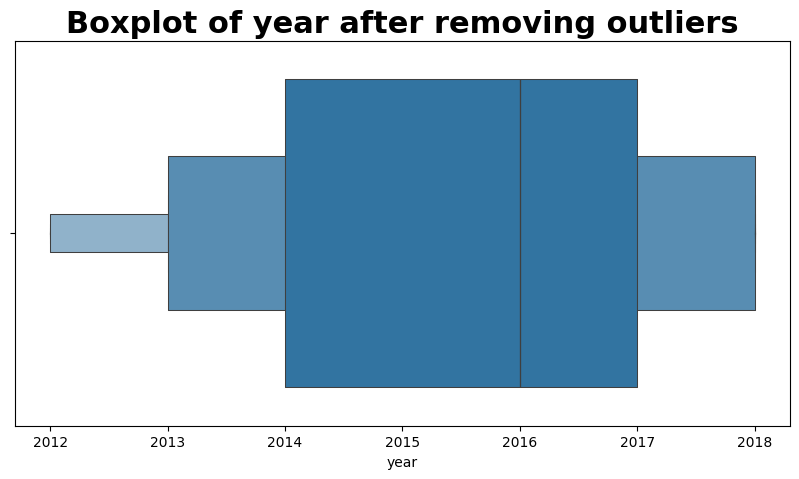

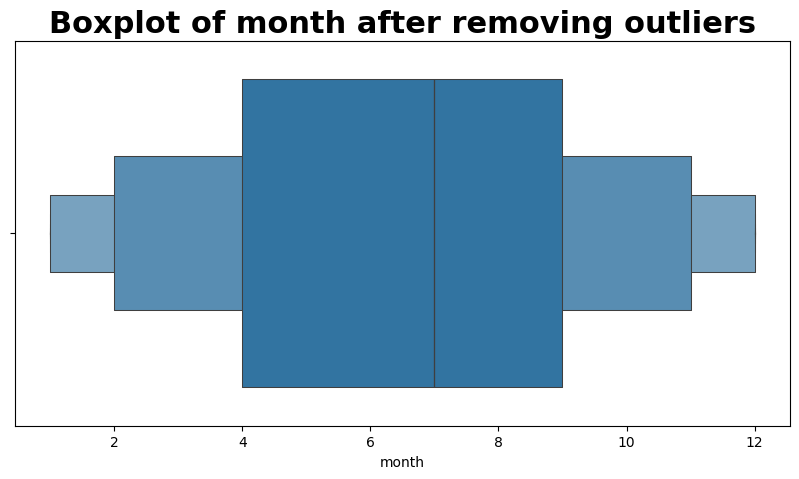

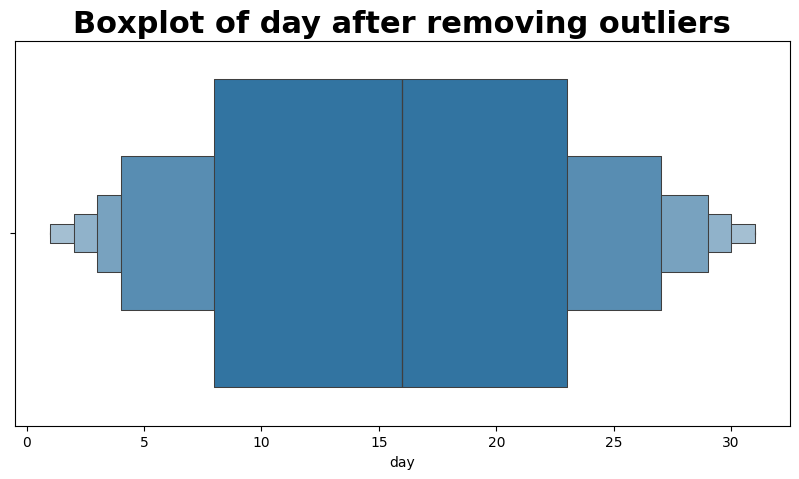

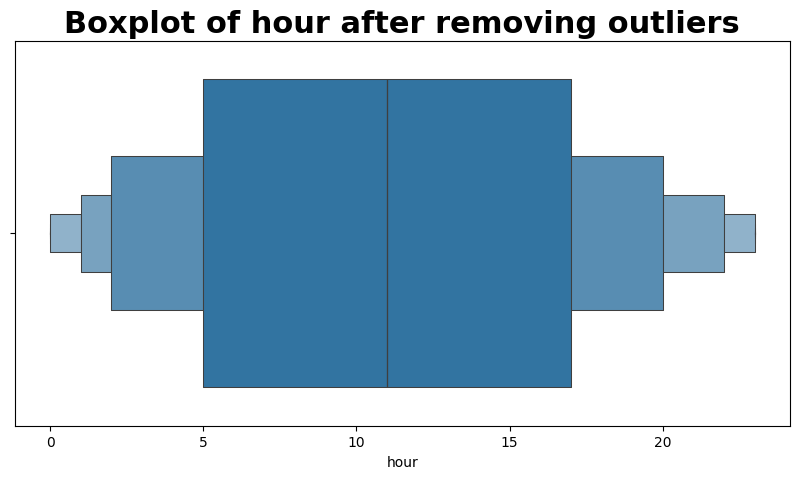

In [125]:
for feat in df.columns:
    if pd.api.types.is_numeric_dtype(df[feat]):
        plt.figure(figsize=(10,5))
        sns.boxenplot(x=df[feat])
        plt.title(f'Boxplot of {feat} after removing outliers', fontsize = 22, fontweight = 'bold')

#Summary Statistics

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48113 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48113 non-null  object        
 1   temp                 48113 non-null  float64       
 2   rain_1h              48113 non-null  float64       
 3   snow_1h              48113 non-null  float64       
 4   clouds_all           48113 non-null  int64         
 5   weather_main         48113 non-null  object        
 6   weather_description  48113 non-null  object        
 7   date_time            48113 non-null  datetime64[ns]
 8   traffic_volume       48113 non-null  int64         
 9   year                 48113 non-null  int32         
 10  month                48113 non-null  int32         
 11  day                  48113 non-null  int32         
 12  hour                 48113 non-null  int32         
dtypes: datetime64[ns](1), float64(3), in

In [127]:
df.describe(include='all')

holiday          temp       rain_1h  snow_1h    clouds_all  \
count        48113  48113.000000  48113.000000  48113.0  48113.000000   
unique          12           NaN           NaN      NaN           NaN   
top     No Holiday           NaN           NaN      NaN           NaN   
freq         48052           NaN           NaN      NaN           NaN   
mean           NaN    281.276028      0.130477      0.0     49.323842   
min            NaN    243.390000      0.000000      0.0      0.000000   
25%            NaN    272.210000      0.000000      0.0      1.000000   
50%            NaN    282.490000      0.000000      0.0     64.000000   
75%            NaN    291.820000      0.000000      0.0     90.000000   
max            NaN    310.070000     55.630000      0.0    100.000000   
std            NaN     12.712448      1.004271      0.0     39.012408   

       weather_main weather_description                      date_time  \
count         48113               48113                          48113   
unique           11                  38                            NaN   
top          Clouds        sky is clear                            NaN   
freq          15158               11649                            NaN   
mean            NaN                 NaN  2016-01-05 10:23:19.879450368   
min             NaN                 NaN            2012-10-02 09:00:00   
25%             NaN                 NaN            2014-02-05 23:00:00   
50%             NaN                 NaN            2016-06-12 09:00:00   
75%             NaN                 NaN            2017-08-11 21:00:00   
max             NaN                 NaN            2018-09-30 23:00:00   
std             NaN                 NaN                            NaN   

        traffic_volume          year         month           day          hour  
count     48113.000000  48113.000000  48113.000000  48113.000000  48113.000000  
unique             NaN           NaN           NaN           NaN           NaN  
top                NaN           NaN           NaN           NaN           NaN  
freq               NaN           NaN           NaN           NaN           NaN  
mean       3260.394488   2015.512543      6.504313     15.731569     11.399476  
min           0.000000   2012.000000      1.000000      1.000000      0.000000  
25%        1194.000000   2014.000000      4.000000      8.000000      5.000000  
50%        3380.000000   2016.000000      7.000000     16.000000     11.000000  
75%        4933.000000   2017.000000      9.000000     23.000000     17.000000  
max        7280.000000   2018.000000     12.000000     31.000000     23.000000  
std        1986.893990      1.894634      3.396332      8.717719      6.940172

#EDA

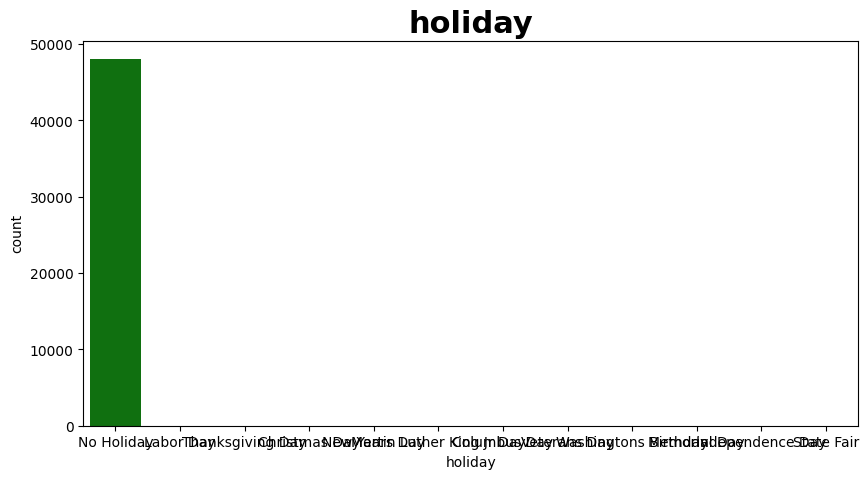

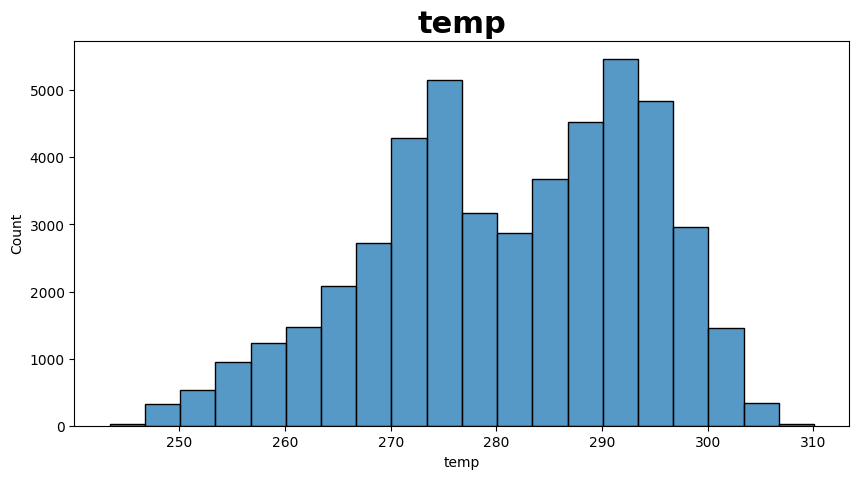

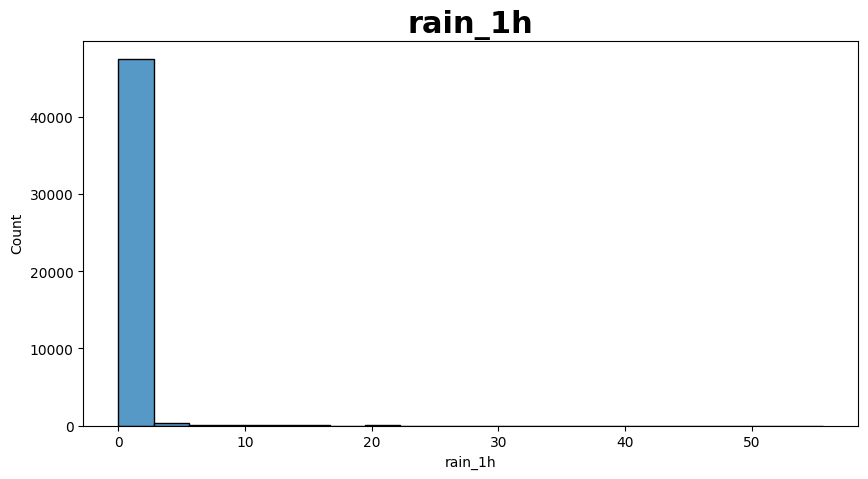

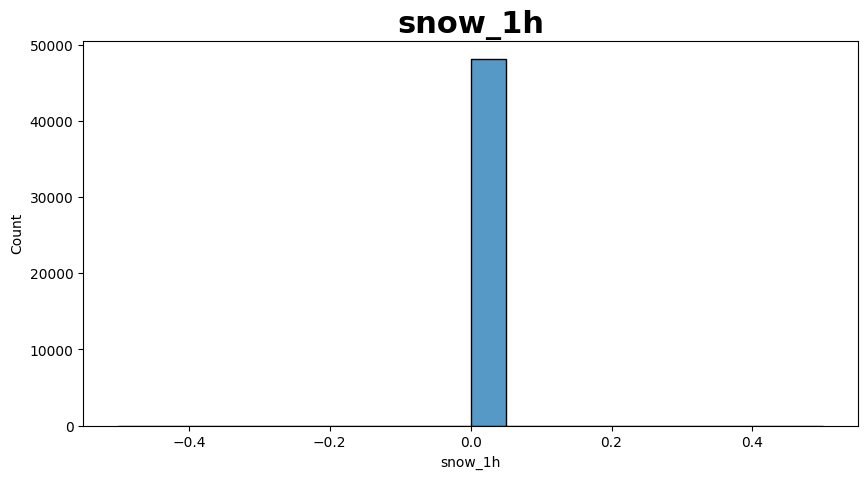

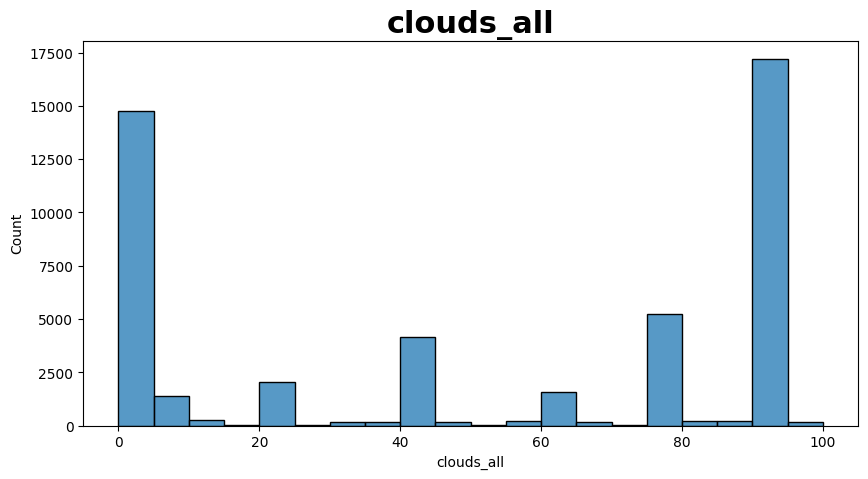

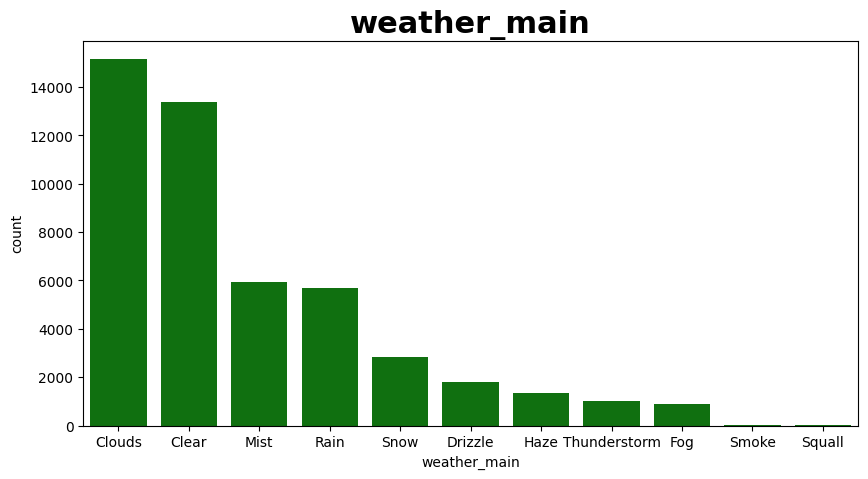

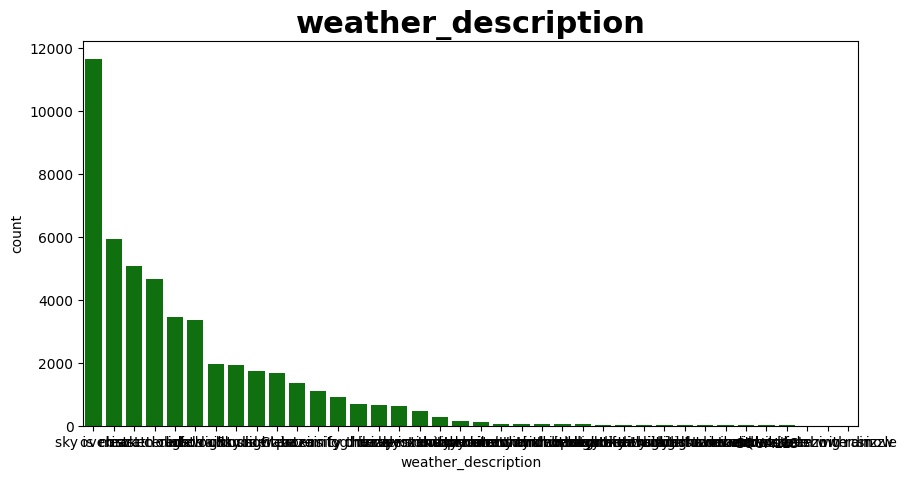

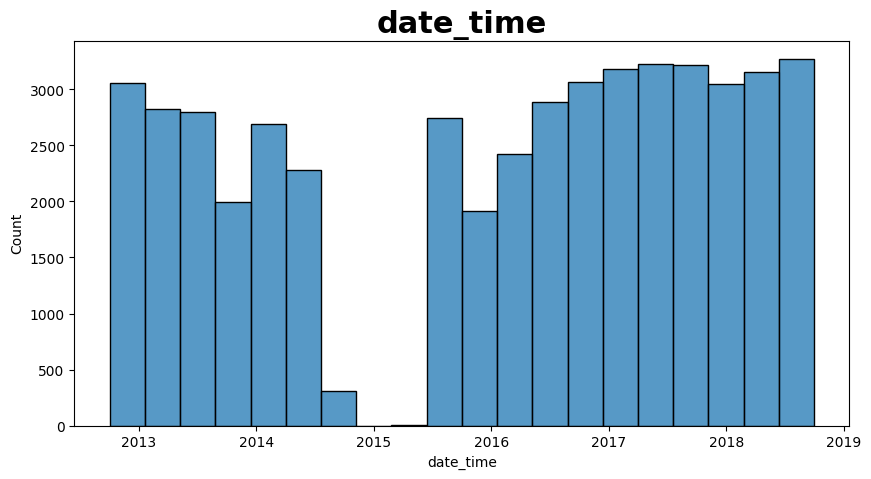

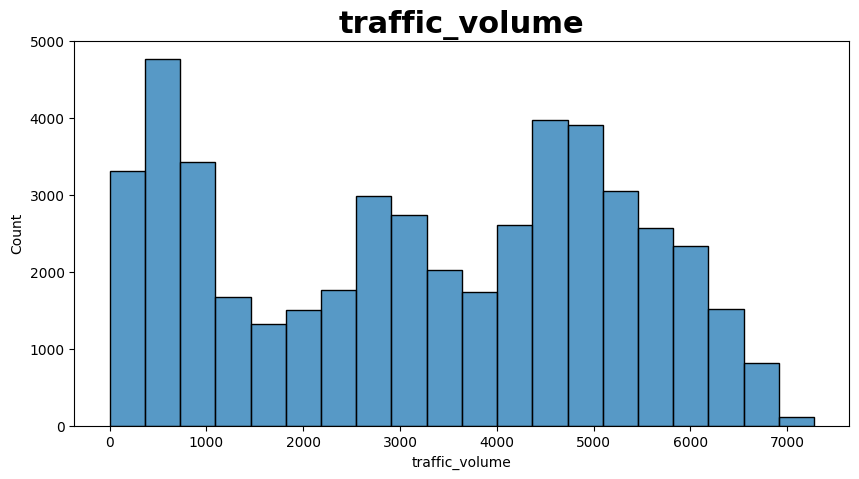

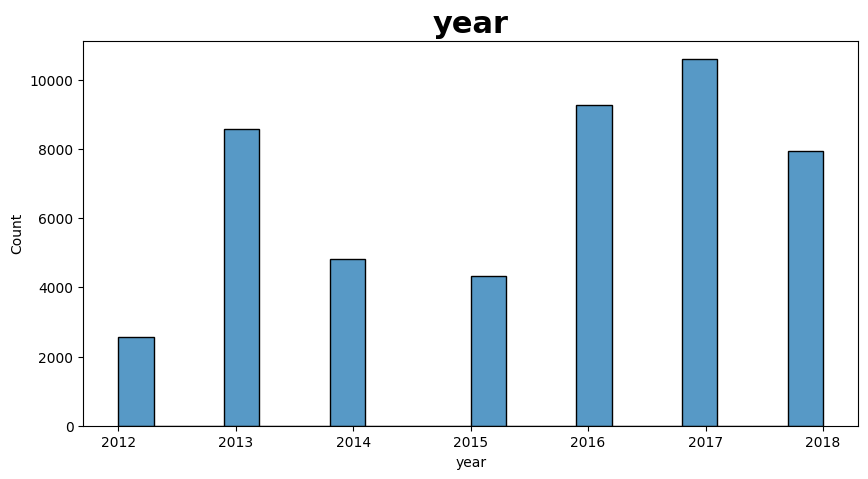

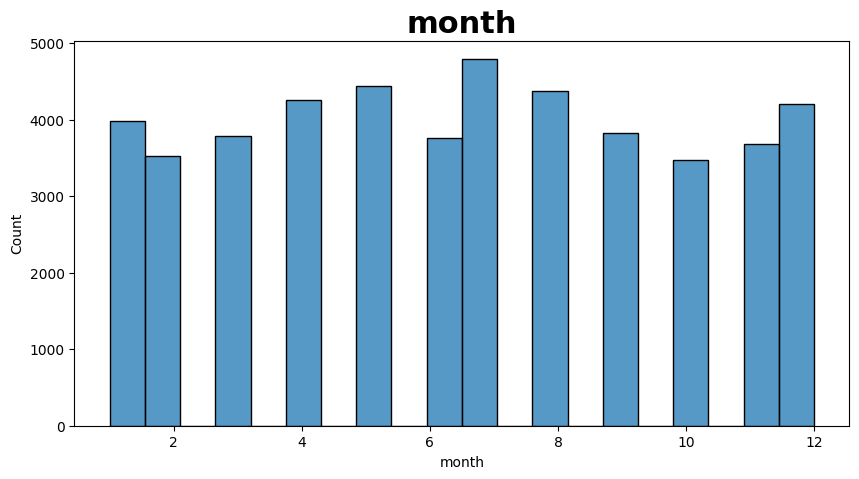

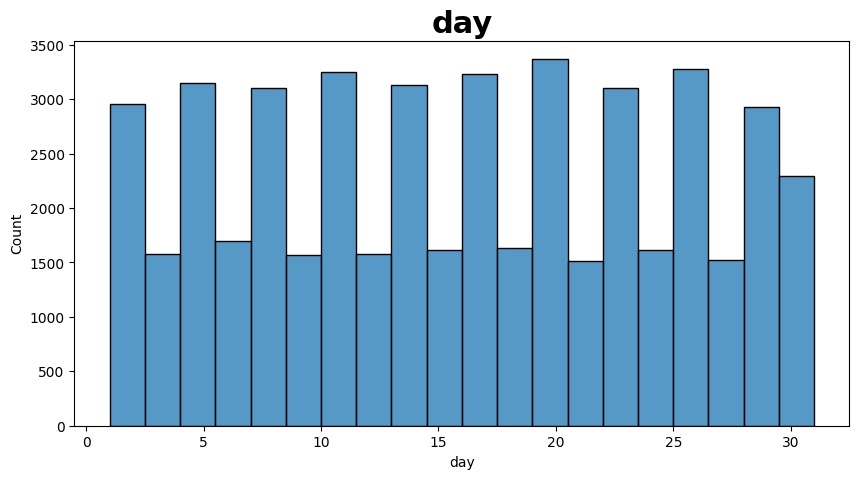

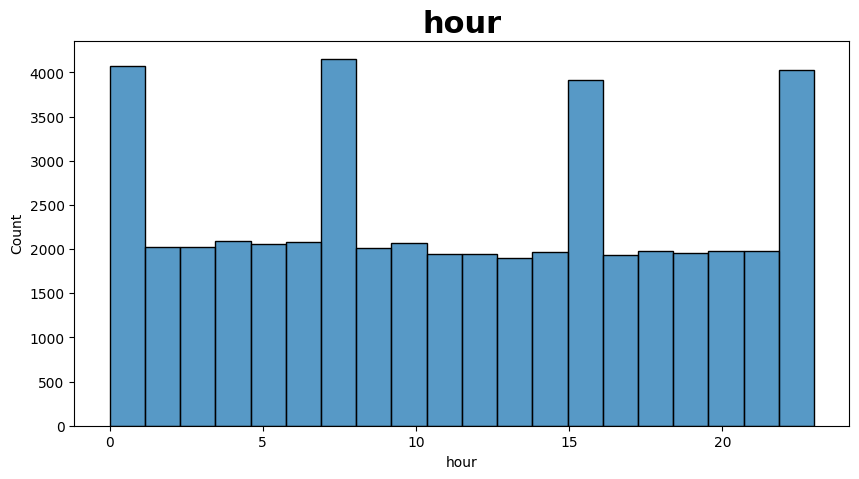

In [128]:
for feat in df.columns:
  plt.figure(figsize = (10,5))
  if df[feat].dtype == 'object':
    order = df[feat].value_counts().index
    sns.countplot(data = df,
                  x = feat,
                  order = order,
                  color = 'green')
  else:
    sns.histplot(data = df,
                 x = feat,
                 bins = 20)
  plt.title(feat, fontsize = 22, fontweight= 'bold')

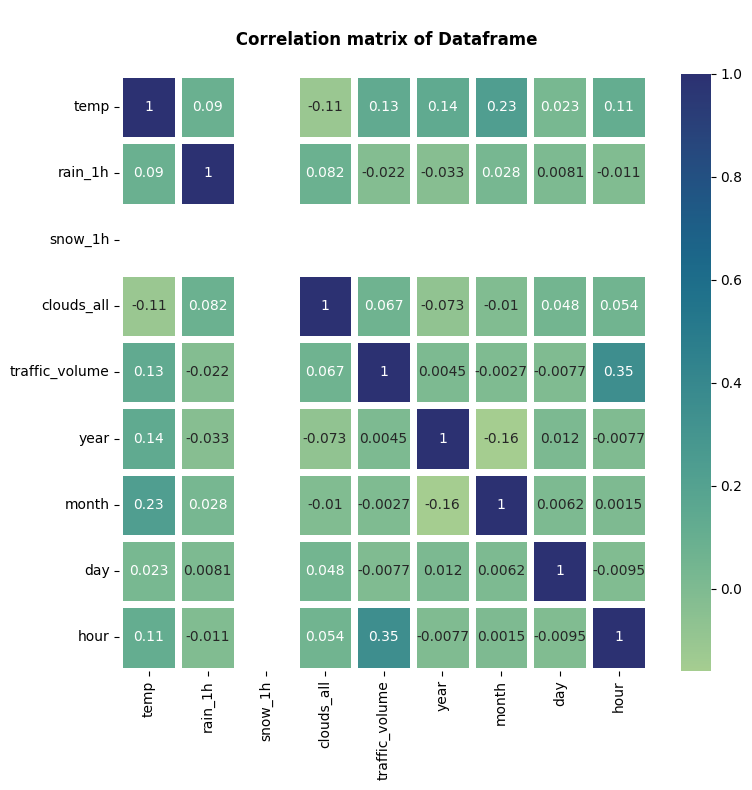

In [129]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),
            annot = True,
            lw = 5,
            cmap='crest')
plt.title('\n Correlation matrix of Dataframe\n', fontweight='bold')
plt.tight_layout()

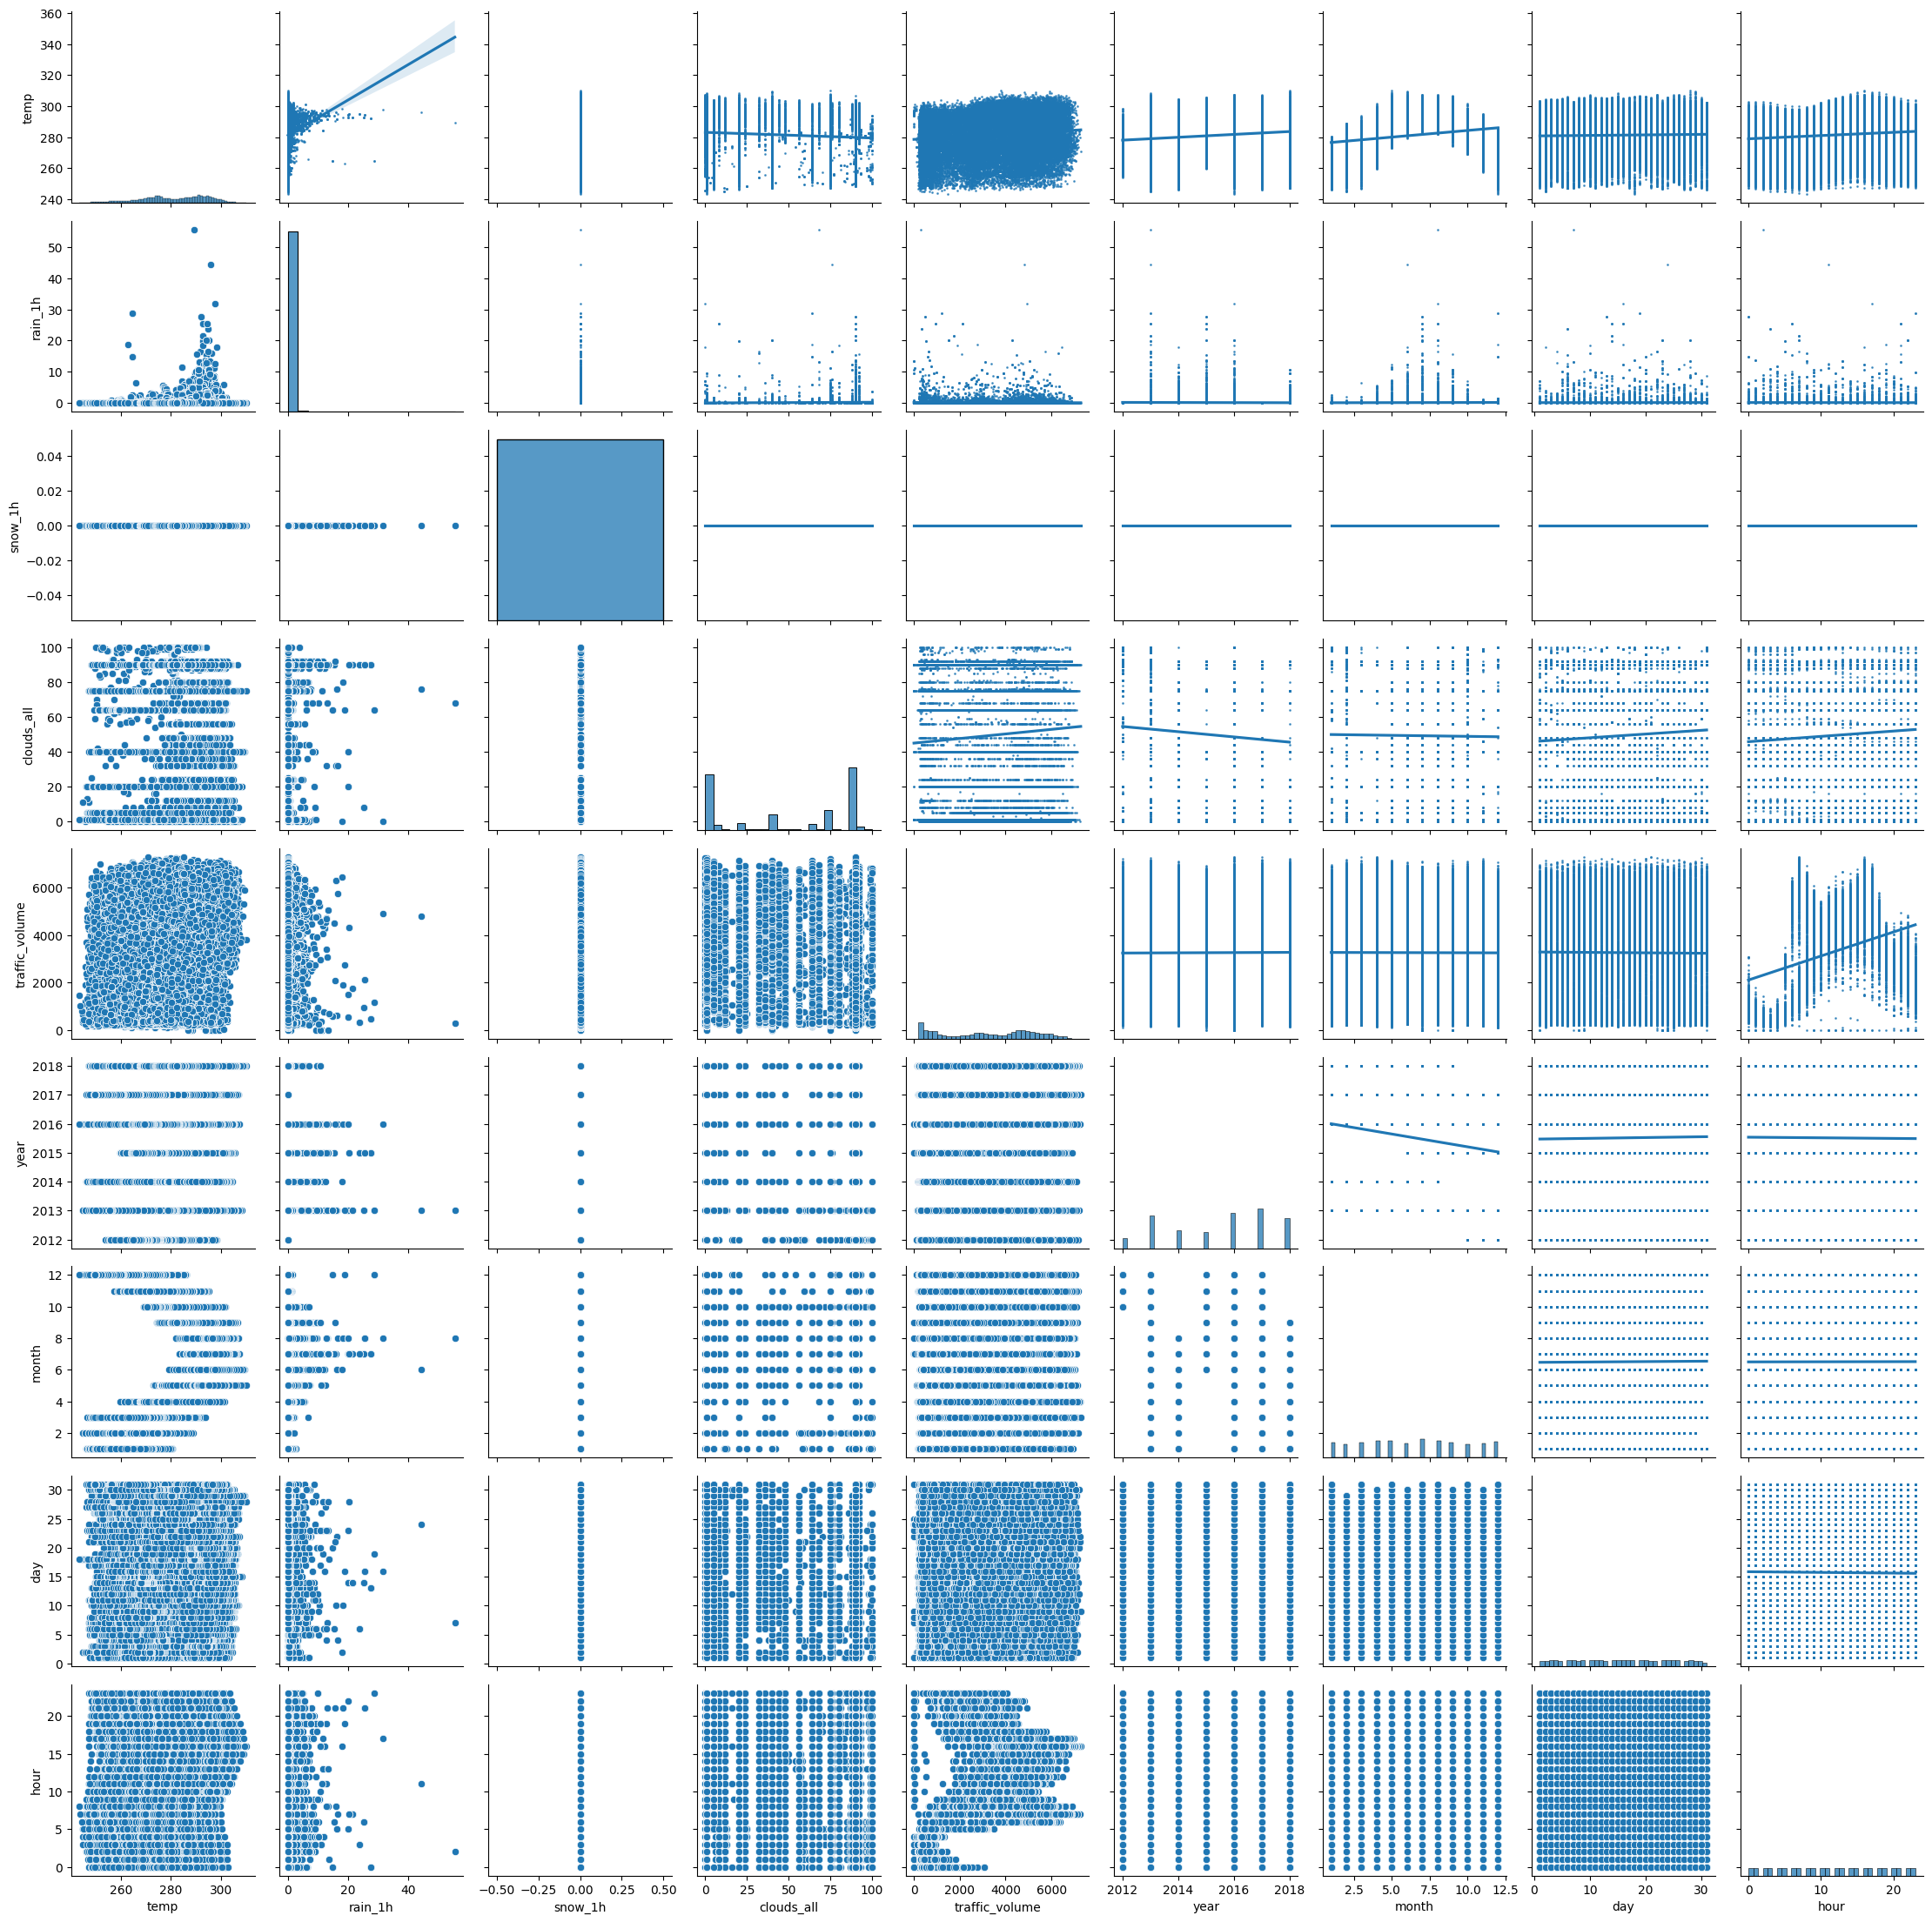

In [130]:
g = sns.PairGrid(data=df)
g.map_diag(sns.histplot)
g.map_upper(sns.regplot, scatter_kws={'alpha':.7, 's':1})
g.map_lower(sns.scatterplot)

#Questions



1. Busiest and Least Busiest times of day?
2. Weather most impactful on Busiest and Least Busiest times of day?
3. Temperature most associated with Busiest and Least Busiest times of day?
4. Busiest and Least Busiest dates of year, by month?
5. Holidays associated with Busiest and Least Busiest dates of year?
6. Temperature most associated with Busiest and Least Busiest dates of year?
7. Busiest and Least Busiest day of the week?
8. Any good predictor of traffic volume?

##1. Busiest and Least Busiest time of day?

In [131]:
df.groupby(df['hour']).agg({'traffic_volume':'mean'}).style.highlight_min(color='blue', axis=0).highlight_max(color = 'red', axis = 0)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

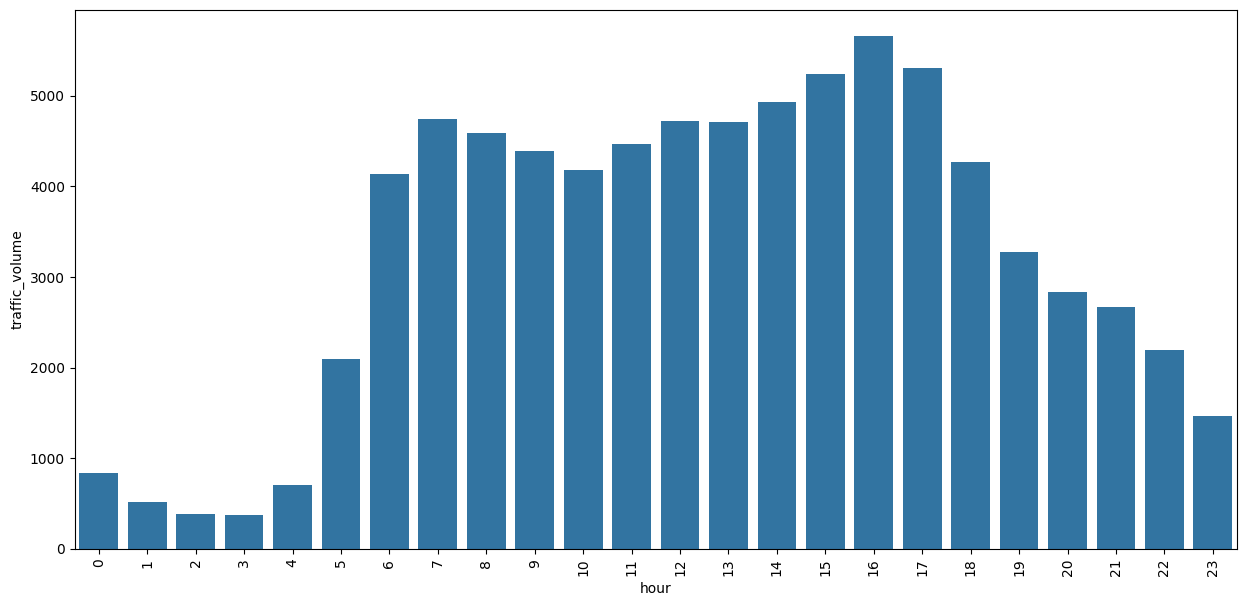

In [132]:
time_group = df.groupby(df['hour']).agg({'traffic_volume':'mean'})

plt.figure(figsize=(15,7))
sns.barplot(
    data = time_group,
    x = 'hour',
    y = 'traffic_volume'
)
plt.xticks(rotation=90)

##2. Weather most impactful on Busiest and Least Busiest times of day?

In [133]:
pd.crosstab(df['hour'], df['weather_main'], values = df['traffic_volume'], aggfunc = 'mean')

weather_main        Clear       Clouds      Drizzle          Fog         Haze  \
hour                                                                            
0              879.468880   815.672165   816.243590   787.950000   891.978261   
1              546.457971   505.480000   492.884615   486.000000   540.000000   
2              407.197269   381.768053   355.666667   384.482143   414.897959   
3              377.476651   371.109339   358.014493   368.880597   376.836735   
4              695.247619   691.980645   722.024691   724.179487   748.069767   
5             2071.254098  2047.080260  2310.393939  2073.952941  2138.644444   
6             4177.399312  4064.168490  4363.610526  4164.068182  4302.177778   
7             4658.276371  4775.211368  4905.392857  4807.109890  4466.775000   
8             4435.044492  4689.616529  4834.125000  4621.621212  4294.542373   
9             4389.343254  4406.074450  4529.034884  4491.000000  4029.428571   
10            4234.737037  4218.473926  4316.975309  4020.242424  4079.812500   
11            4538.737475  4521.494949  4489.493151  4046.333333  4347.623529   
12            4797.020000  4761.809524  4673.117647  4223.100000  4649.500000   
13            4789.492473  4751.640407  4767.770492  3951.142857  4590.362500   
14            5006.664414  4968.103651  4983.084746  4272.058824  4879.896552   
15            5294.017582  5298.160200  5316.228571  4286.285714  5083.891892   
16            5734.848485  5774.736211  5845.358209  4277.736842  5500.615385   
17            5375.424942  5411.290086  5335.881579  3470.294118  5220.096154   
18            4341.529532  4368.791451  4277.705128  3124.562500  4291.607843   
19            3386.408397  3338.269388  3226.945946  2396.928571  3265.476190   
20            2929.242958  2889.481583  2773.905405  2212.916667  2818.974359   
21            2744.282178  2728.597561  2597.369048  2223.571429  2699.085714   
22            2295.687591  2226.264505  2053.268293  2285.000000  2081.725000   
23            1536.304878  1495.011719  1369.296296  1498.821429  1419.361702   

weather_main         Mist         Rain   Smoke         Snow  Squall  \
hour                                                                  
0              797.324627   837.582609     NaN   755.680672     NaN   
1              500.261438   506.928889   890.0   459.912000     NaN   
2              375.919094   377.038298   630.0   368.161290   420.0   
3              366.317280   372.704918   420.0   358.771654     NaN   
4              719.129288   715.325893   367.0   671.289062   400.0   
5             2135.010076  2169.765487   723.0  2025.269565     NaN   
6             4134.282500  4261.265306  1347.0  3913.731707     NaN   
7             4795.713942  4893.914163  2182.0  4440.232000     NaN   
8             4718.942708  4747.991228  3139.0  4024.955556     NaN   
9             4438.464516  4484.628319  4085.0  4139.592593     NaN   
10            4129.697842  4213.604348     NaN  3982.219178     NaN   
11            4339.226601  4482.554585     NaN  4215.084615     NaN   
12            4591.347059  4694.695652  4448.0  4474.291339     NaN   
13            4555.661654  4731.044248  4372.5  4490.090909     NaN   
14            4837.788321  4944.427948  4888.0  4613.367925  4211.0   
15            5105.446154  5262.871245  5205.0  4952.486957     NaN   
16            5406.051095  5643.733333  5979.0  5157.871287     NaN   
17            5039.051852  5375.070588  5861.0  4824.100000     NaN   
18            3969.136054  4226.696970  4264.0  3852.390476     NaN   
19            2983.833333  3259.628906  3040.0  2900.771429     NaN   
20            2582.113208  2797.725322  2561.0  2517.879630  3216.0   
21            2489.524862  2637.420408     NaN  2444.944954     NaN   
22            2069.568421  2092.818565     NaN  2109.293578     NaN   
23            1376.322449  1431.375546     NaN  1325.427350     NaN   

weather_main  Thunderstorm  
hour             

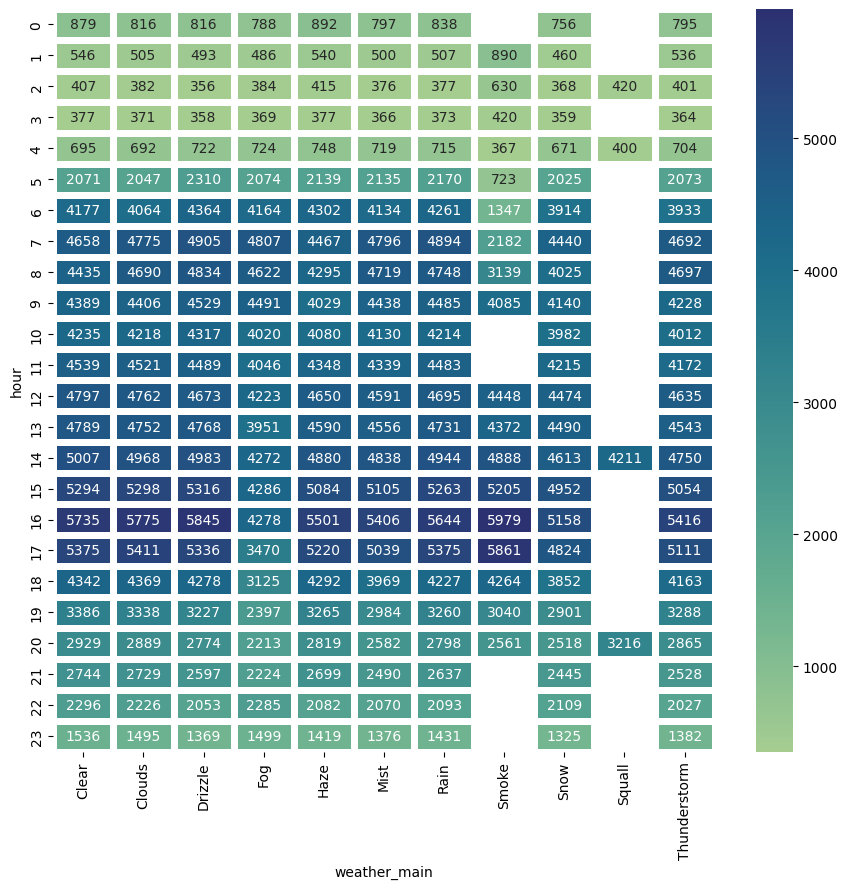

In [134]:
cross_tab = pd.crosstab(df['hour'], df['weather_main'], values = df['traffic_volume'], aggfunc = 'mean')

plt.figure(figsize=(9,9))
sns.heatmap(
    data = cross_tab,
    annot = True,
    lw = 5,
    cmap = 'crest',
    fmt = '.0f'
)
plt.tight_layout()

<Axes: xlabel='hour', ylabel='traffic_volume'>

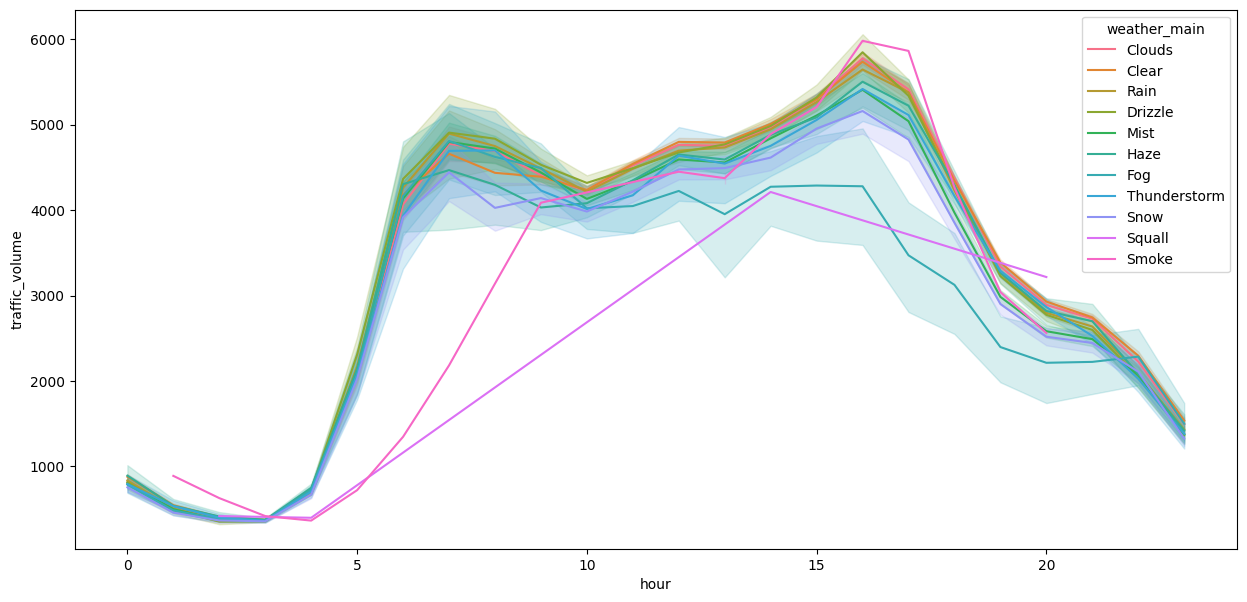

In [135]:
plt.figure(figsize=(15,7))
sns.lineplot(
    data = df,
    x = 'hour',
    y = 'traffic_volume',
    hue = 'weather_main'
)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48113 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48113 non-null  object        
 1   temp                 48113 non-null  float64       
 2   rain_1h              48113 non-null  float64       
 3   snow_1h              48113 non-null  float64       
 4   clouds_all           48113 non-null  int64         
 5   weather_main         48113 non-null  object        
 6   weather_description  48113 non-null  object        
 7   date_time            48113 non-null  datetime64[ns]
 8   traffic_volume       48113 non-null  int64         
 9   year                 48113 non-null  int32         
 10  month                48113 non-null  int32         
 11  day                  48113 non-null  int32         
 12  hour                 48113 non-null  int32         
dtypes: datetime64[ns](1), float64(3), in

###Fog

<Axes: xlabel='hour', ylabel='traffic_volume'>

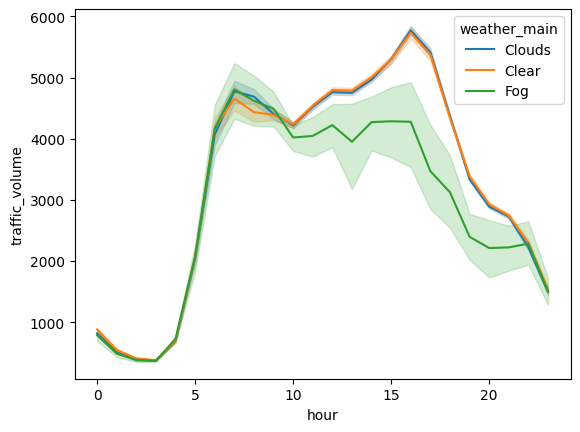

In [137]:
df_fog = df[df['weather_main'].isin(['Fog','Clear','Clouds'])]

sns.lineplot(
    data = df_fog,
    x = 'hour',
    y = 'traffic_volume',
    hue = 'weather_main'
)

In [138]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'year', 'month',
       'day', 'hour'],
      dtype='object')

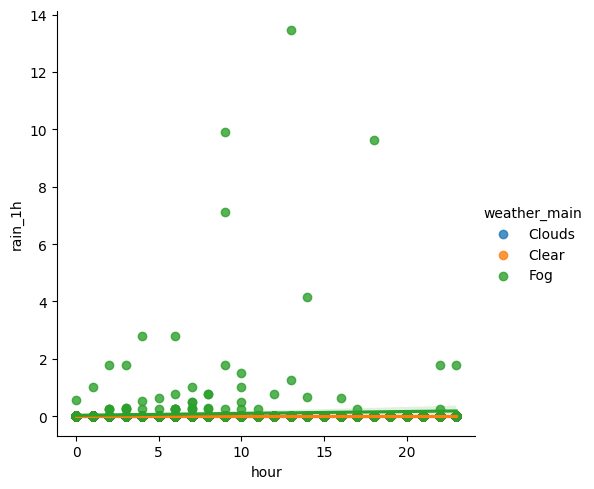

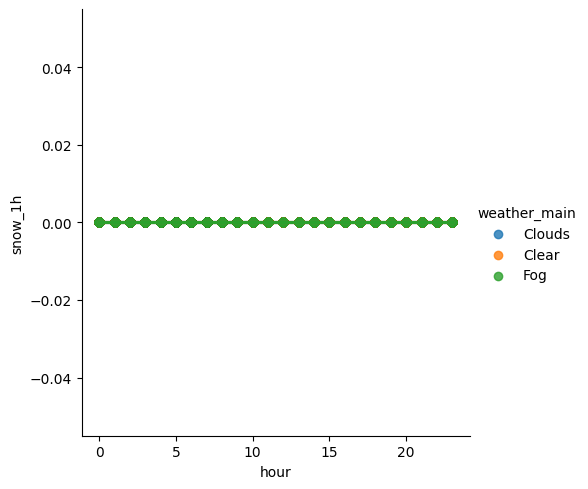

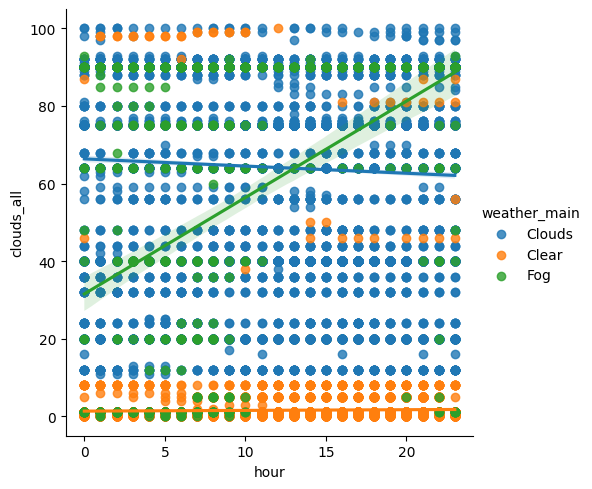

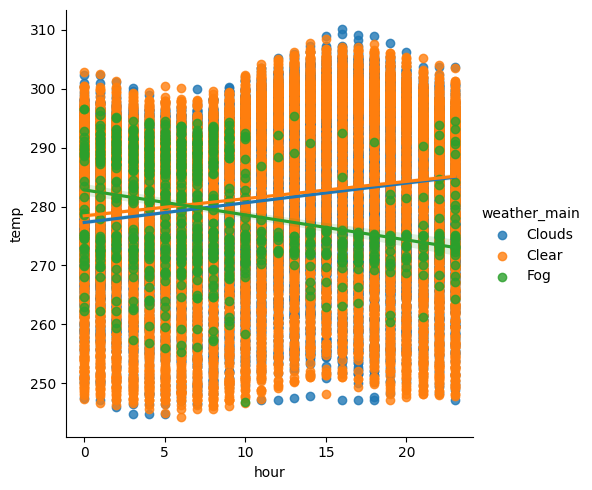

In [139]:
df_fog = df[df['weather_main'].isin(['Fog','Clear','Clouds'])]

metrics = ['rain_1h','snow_1h','clouds_all','temp']

for feat in metrics:
  sns.lmplot(
      data = df_fog,
      x = 'hour',
      y = feat,
      hue = 'weather_main'
  )

<Axes: xlabel='hour', ylabel='clouds_all'>

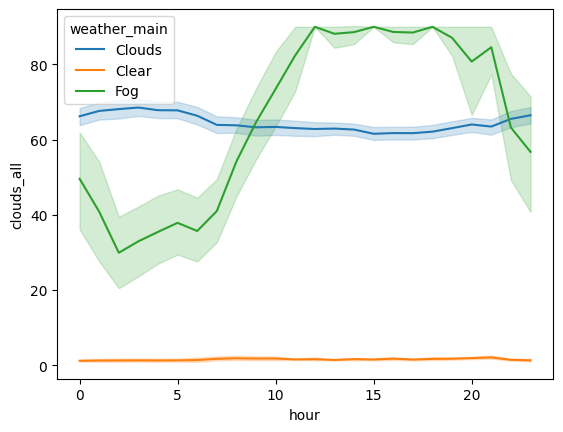

In [140]:
sns.lineplot(
    data = df_fog,
    x = 'hour',
    y = 'clouds_all',
    hue = 'weather_main'
)

<Axes: xlabel='hour', ylabel='temp'>

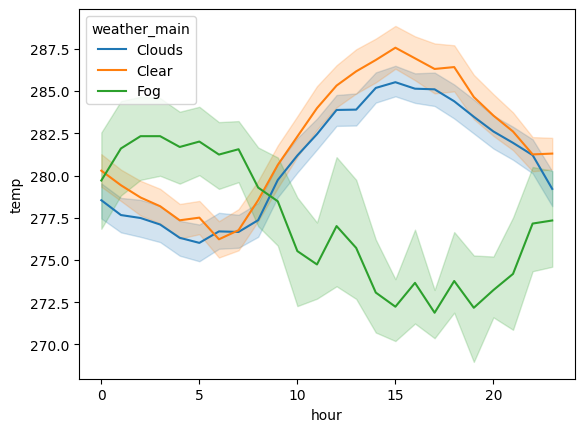

In [141]:
sns.lineplot(
    data = df_fog,
    x = 'hour',
    y = 'temp',
    hue = 'weather_main'
)

###Rain

<Axes: xlabel='hour', ylabel='traffic_volume'>

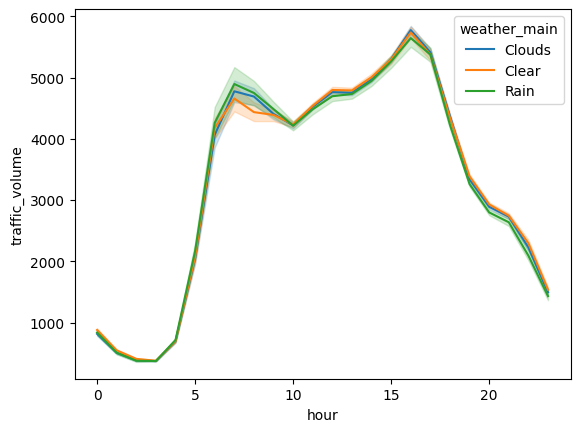

In [142]:
df_rain = df[df['weather_main'].isin(['Rain','Clear','Clouds'])]

sns.lineplot(
    data = df_rain,
    x = 'hour',
    y = 'traffic_volume',
    hue = 'weather_main'
)

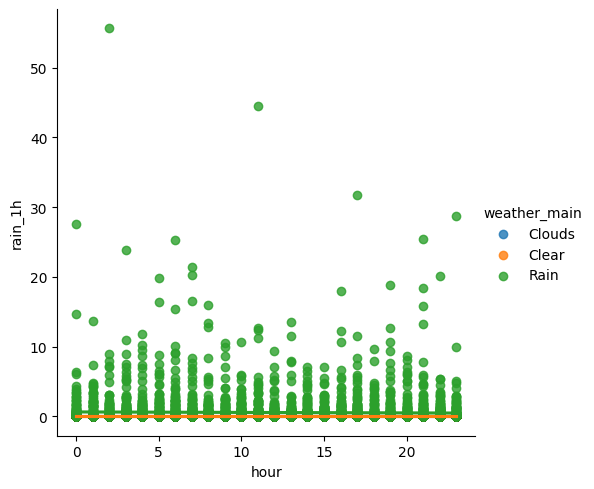

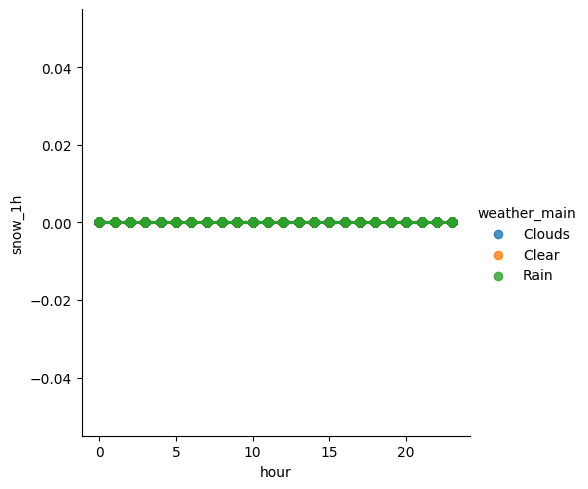

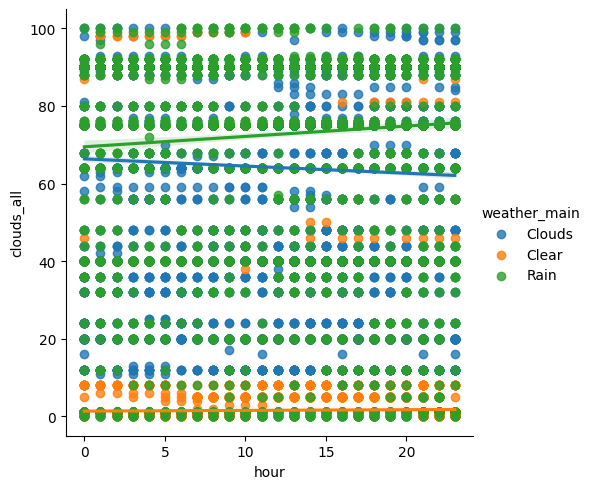

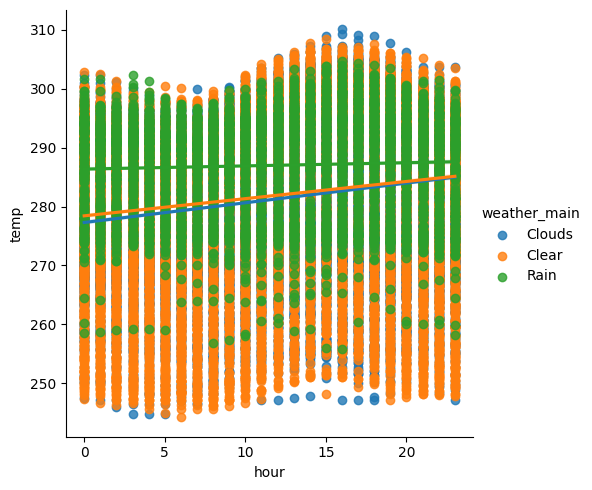

In [143]:
metrics = ['rain_1h','snow_1h','clouds_all','temp']

for feat in metrics:
  sns.lmplot(
      data = df_rain,
      x = 'hour',
      y = feat,
      hue = 'weather_main'
  )

<Axes: xlabel='hour', ylabel='temp'>

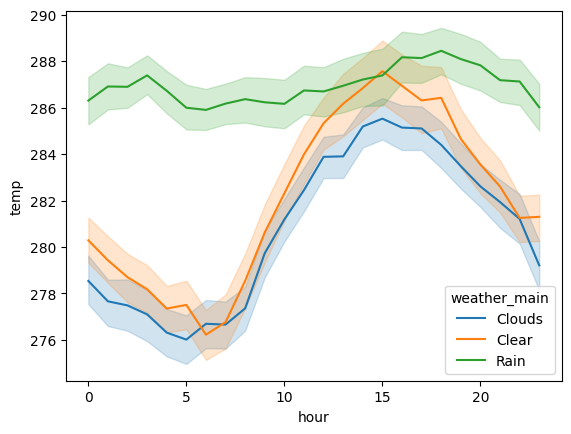

In [144]:
sns.lineplot(
    data = df_rain,
    x = 'hour',
    y = 'temp',
    hue = 'weather_main'
)

###Thunderstorm

<Axes: xlabel='hour', ylabel='traffic_volume'>

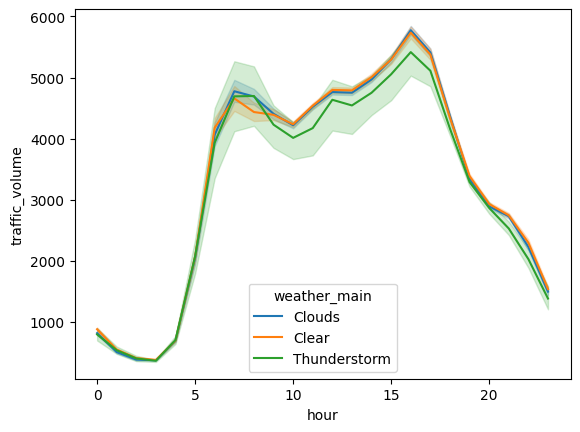

In [145]:
df_thund = df[df['weather_main'].isin(['Thunderstorm','Clear','Clouds'])]

sns.lineplot(
    data = df_thund,
    x = 'hour',
    y = 'traffic_volume',
    hue = 'weather_main'
)

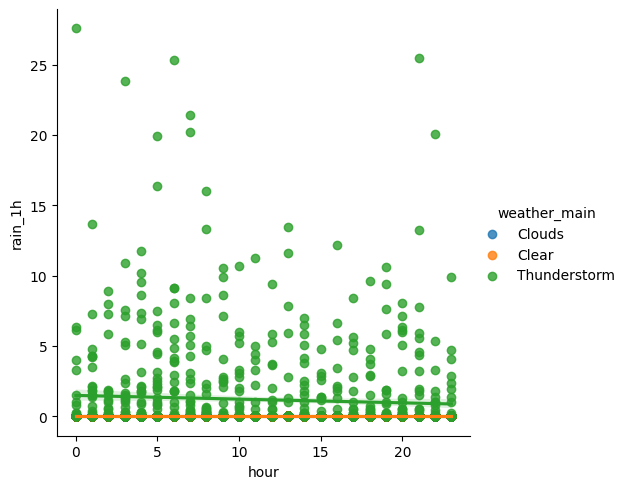

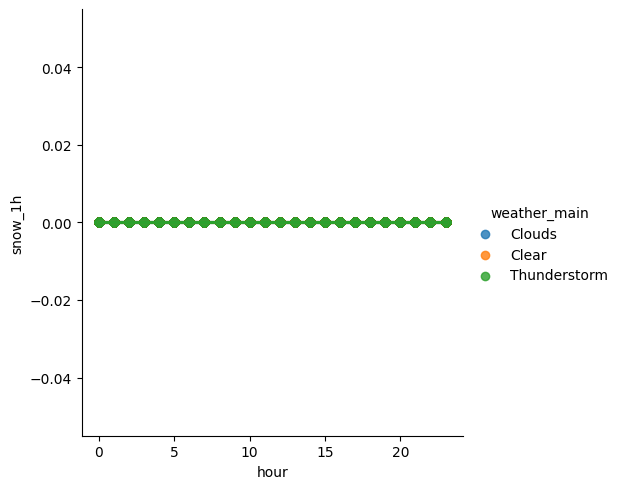

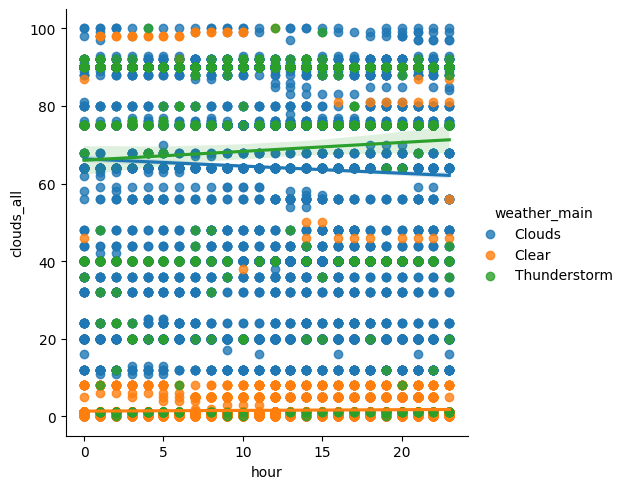

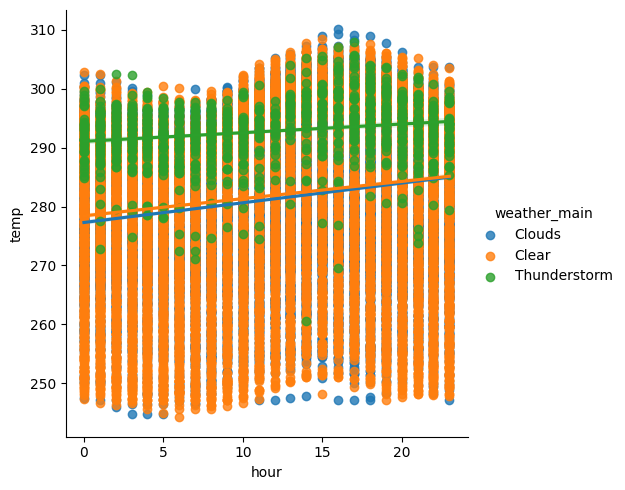

In [146]:
metrics = ['rain_1h','snow_1h','clouds_all','temp']

for feat in metrics:
  sns.lmplot(
      data = df_thund,
      x = 'hour',
      y = feat,
      hue = 'weather_main'
  )

<Axes: xlabel='hour', ylabel='temp'>

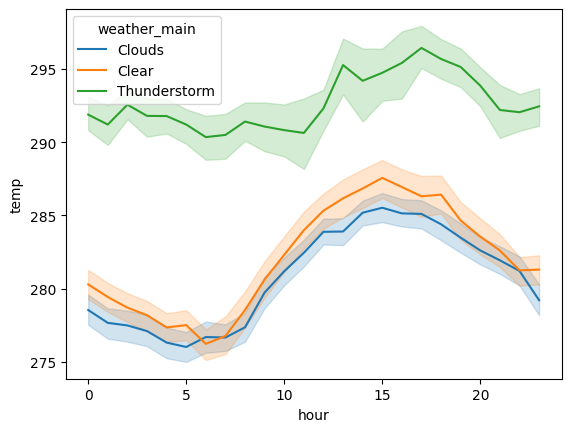

In [147]:
sns.lineplot(
    data = df_thund,
    x = 'hour',
    y = 'temp',
    hue = 'weather_main'
)

###Snow

<Axes: xlabel='hour', ylabel='traffic_volume'>

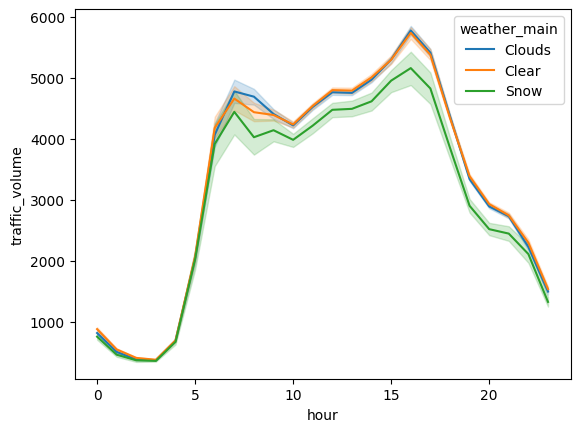

In [148]:
df_snow = df[df['weather_main'].isin(['Snow','Clear','Clouds'])]

sns.lineplot(
    data = df_snow,
    x = 'hour',
    y = 'traffic_volume',
    hue = 'weather_main'
)

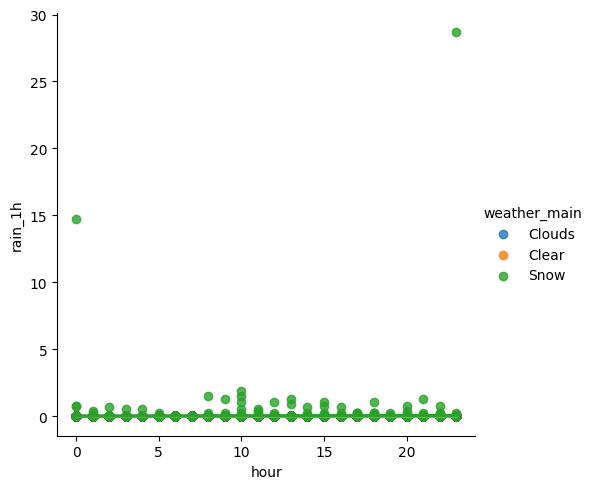

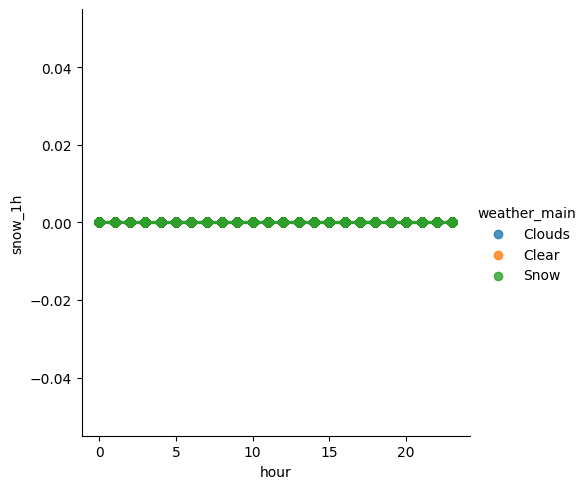

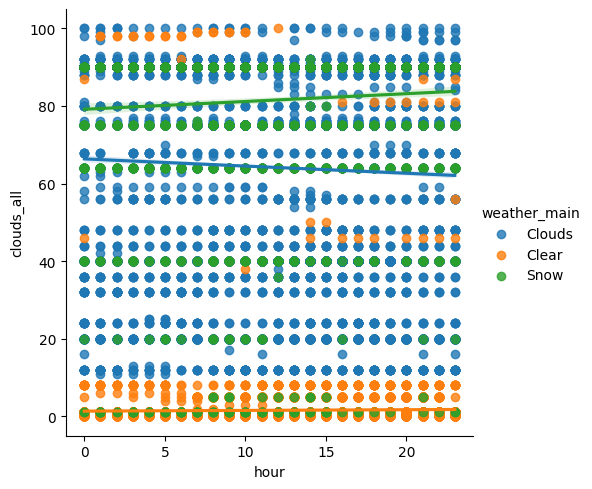

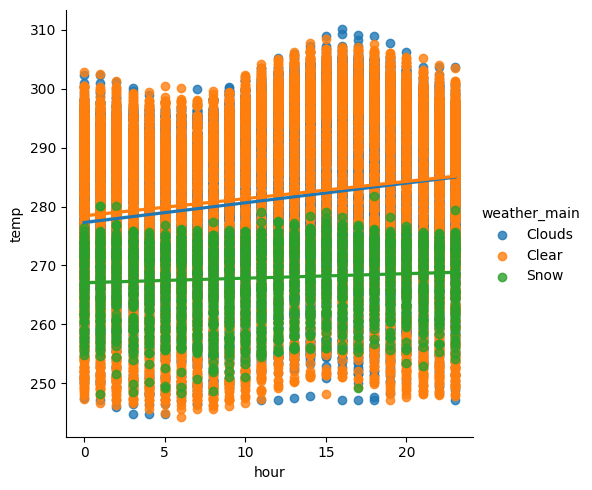

In [149]:
metrics = ['rain_1h','snow_1h','clouds_all','temp']

for feat in metrics:
  sns.lmplot(
      data = df_snow,
      x = 'hour',
      y = feat,
      hue = 'weather_main'
  )

<Axes: xlabel='hour', ylabel='temp'>

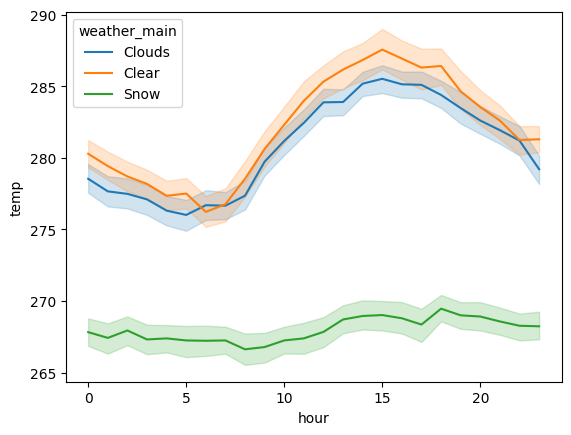

In [150]:
sns.lineplot(
    data = df_snow,
    x = 'hour',
    y = 'temp',
    hue = 'weather_main'
)

##3. Temperature most associated with Busiest and Least Busiest times of day?

In [151]:
df.groupby(df['hour']).agg({'temp':'mean', 'traffic_volume':'mean'}).style.highlight_min(color='blue', axis=0).highlight_max(color = 'red', axis = 0)

Text(0.5, 1.0, '\nMean Temperature and Traffic Volume by Hour\n')

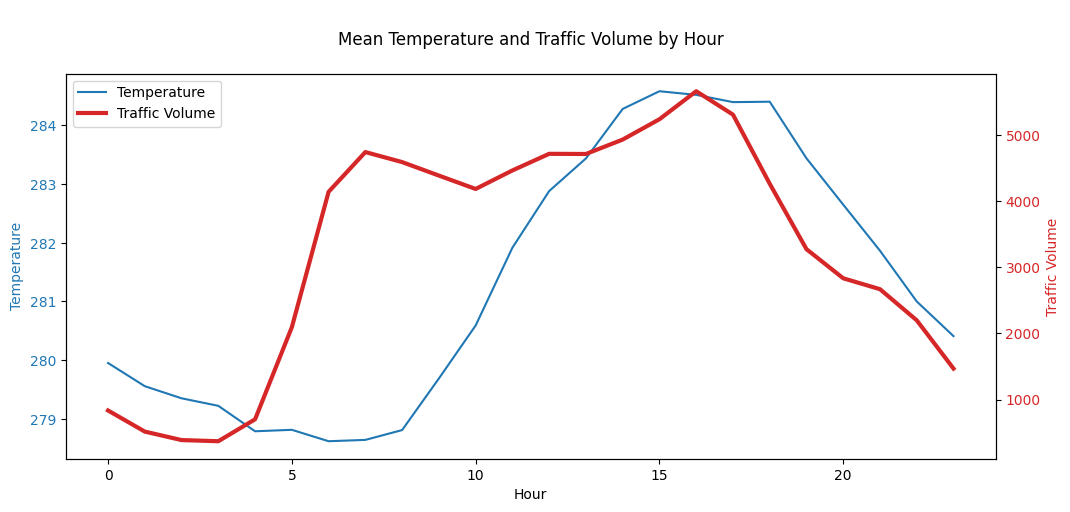

In [152]:
# Group by 'hour' and calculate the mean of 'temp' and 'traffic_volume'
mean_data = df.groupby(df['hour']).agg({'temp': 'mean', 'traffic_volume': 'mean'})

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot temp on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature', color=color)
ax1.plot(mean_data.index, mean_data['temp'], color=color, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis to plot traffic_volume
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Traffic Volume', color=color)
ax2.plot(mean_data.index, mean_data['traffic_volume'], color=color, label='Traffic Volume', lw=3)
ax2.tick_params(axis='y', labelcolor=color)

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('\nMean Temperature and Traffic Volume by Hour\n')

##4. Busiest and Least Busiest dates of year?, by month*

In [153]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'year', 'month',
       'day', 'hour'],
      dtype='object')

In [154]:
pd.crosstab(df['day'], df['month'], values = df['traffic_volume'], aggfunc = 'mean').style.highlight_min(color='blue', axis=0).highlight_max(color = 'red', axis = 0)

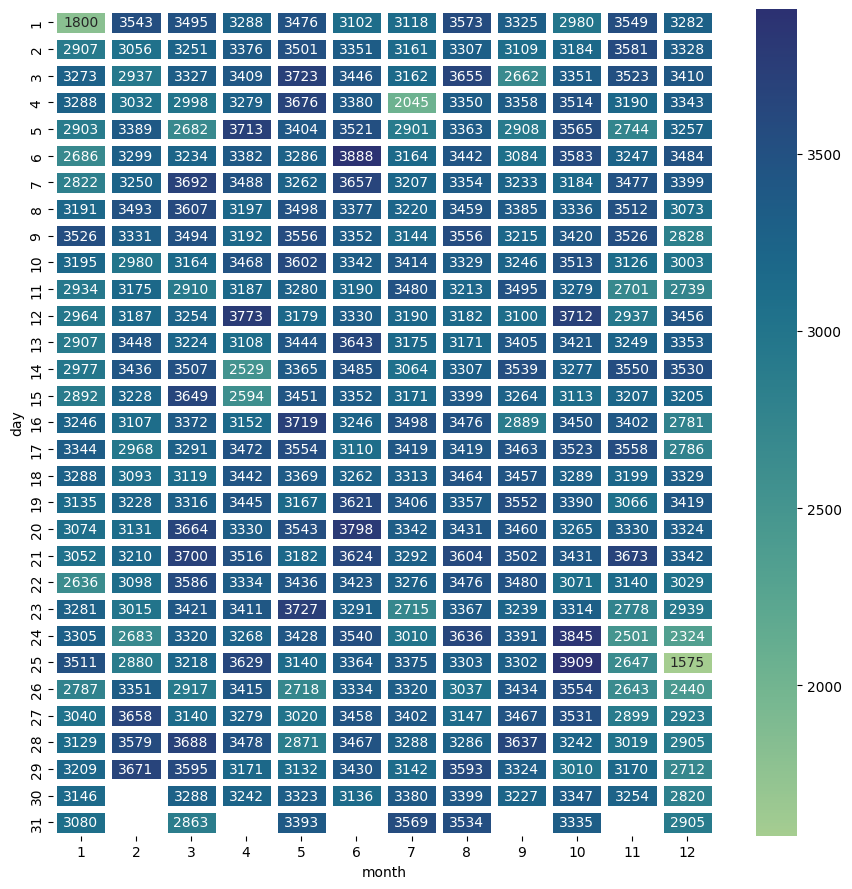

In [155]:
crosstab2 = pd.crosstab(df['day'], df['month'], values = df['traffic_volume'], aggfunc = 'mean')

plt.figure(figsize=(9,9))
sns.heatmap(
    data = crosstab2,
    annot = True,
    lw = 5,
    cmap = 'crest',
    fmt = '.0f'
)
plt.tight_layout()

In [156]:
df.groupby(df['day']).agg({'traffic_volume':'mean'}).style.highlight_min(color='blue', axis=0).highlight_max(color = 'red', axis = 0)

In [157]:
#how do we display a table displaying the rates of the highest and lowest value days?

##5. Holidays associated with Busiest and Least Busiest dates of year, by month?

In [158]:
df_no_holiday = df[df['holiday'] != 'No Holiday']

In [159]:
df.groupby(df['holiday']).mean(numeric_only=True)#.style.highlight_min(color='blue', axis=0).highlight_max(color = 'red', axis = 0)

temp   rain_1h  snow_1h  clouds_all  \
holiday                                                                
Christmas Day              267.295000  0.041667      0.0   70.833333   
Columbus Day               282.156200  0.000000      0.0    4.400000   
Independence Day           292.038000  0.000000      0.0    1.000000   
Labor Day                  292.934286  0.505714      0.0   39.000000   
Martin Luther King Jr Day  265.261667  0.000000      0.0   56.000000   
Memorial Day               290.883400  0.000000      0.0   39.000000   
New Years Day              260.915000  0.000000      0.0   69.833333   
No Holiday                 281.279786  0.130564      0.0   49.331599   
State Fair                 290.984000  0.000000      0.0   21.000000   
Thanksgiving Day           274.583333  0.000000      0.0   56.666667   
Veterans Day               278.110000  0.000000      0.0   45.600000   
Washingtons Birthday       269.507800  0.000000      0.0   57.600000   

                           traffic_volume         year      month        day  \
holiday                                                                        
Christmas Day                  827.500000  2014.833333  12.000000  25.333333   
Columbus Day                   519.400000  2014.600000  10.000000  10.600000   
Independence Day              1076.000000  2015.800000   7.000000   3.800000   
Labor Day                     1013.142857  2016.142857   9.000000   4.142857   
Martin Luther King Jr Day      612.666667  2017.000000   1.000000  16.166667   
Memorial Day                  1107.600000  2015.600000   5.000000  28.000000   
New Years Day                 1356.000000  2015.666667   1.000000   1.166667   
No Holiday                    3263.434779  2015.512549   6.503663  15.732581   
State Fair                     634.800000  2015.800000   8.000000  24.200000   
Thanksgiving Day               933.500000  2014.666667  11.000000  24.833333   
Veterans Day                   691.400000  2014.600000  11.000000  11.000000   
Washingtons Birthday           635.200000  2015.600000   2.000000  17.800000   

                                hour  
holiday                               
Christmas Day               0.000000  
Columbus Day                0.000000  
Independence Day            0.000000  
Labor Day                   0.000000  
Martin Luther King Jr Day   0.000000  
Memorial Day                0.000000  
New Years Day               0.000000  
No Holiday                 11.413947  
State Fair                  0.000000  
Thanksgiving Day            0.000000  
Veterans Day                0.000000  
Washingtons Birthday        0.000000

In [160]:
df_no_holiday.groupby(df['holiday']).mean(numeric_only=True)#.style.highlight_min(color='blue', axis=0).highlight_max(color = 'red', axis = 0)

temp   rain_1h  snow_1h  clouds_all  \
holiday                                                                
Christmas Day              267.295000  0.041667      0.0   70.833333   
Columbus Day               282.156200  0.000000      0.0    4.400000   
Independence Day           292.038000  0.000000      0.0    1.000000   
Labor Day                  292.934286  0.505714      0.0   39.000000   
Martin Luther King Jr Day  265.261667  0.000000      0.0   56.000000   
Memorial Day               290.883400  0.000000      0.0   39.000000   
New Years Day              260.915000  0.000000      0.0   69.833333   
State Fair                 290.984000  0.000000      0.0   21.000000   
Thanksgiving Day           274.583333  0.000000      0.0   56.666667   
Veterans Day               278.110000  0.000000      0.0   45.600000   
Washingtons Birthday       269.507800  0.000000      0.0   57.600000   

                           traffic_volume         year  month        day  hour  
holiday                                                                         
Christmas Day                  827.500000  2014.833333   12.0  25.333333   0.0  
Columbus Day                   519.400000  2014.600000   10.0  10.600000   0.0  
Independence Day              1076.000000  2015.800000    7.0   3.800000   0.0  
Labor Day                     1013.142857  2016.142857    9.0   4.142857   0.0  
Martin Luther King Jr Day      612.666667  2017.000000    1.0  16.166667   0.0  
Memorial Day                  1107.600000  2015.600000    5.0  28.000000   0.0  
New Years Day                 1356.000000  2015.666667    1.0   1.166667   0.0  
State Fair                     634.800000  2015.800000    8.0  24.200000   0.0  
Thanksgiving Day               933.500000  2014.666667   11.0  24.833333   0.0  
Veterans Day                   691.400000  2014.600000   11.0  11.000000   0.0  
Washingtons Birthday           635.200000  2015.600000    2.0  17.800000   0.0

In [161]:
df.groupby(df['holiday']).agg({'traffic_volume':'mean'}).style.highlight_min(color='blue', axis=0).highlight_max(color = 'red', axis = 0)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Columbus Day'),
  Text(1, 0, 'Veterans Day'),
  Text(2, 0, 'Thanksgiving Day'),
  Text(3, 0, 'Christmas Day'),
  Text(4, 0, 'New Years Day'),
  Text(5, 0, 'Washingtons Birthday'),
  Text(6, 0, 'Memorial Day'),
  Text(7, 0, 'Independence Day'),
  Text(8, 0, 'State Fair'),
  Text(9, 0, 'Labor Day'),
  Text(10, 0, 'Martin Luther King Jr Day')])

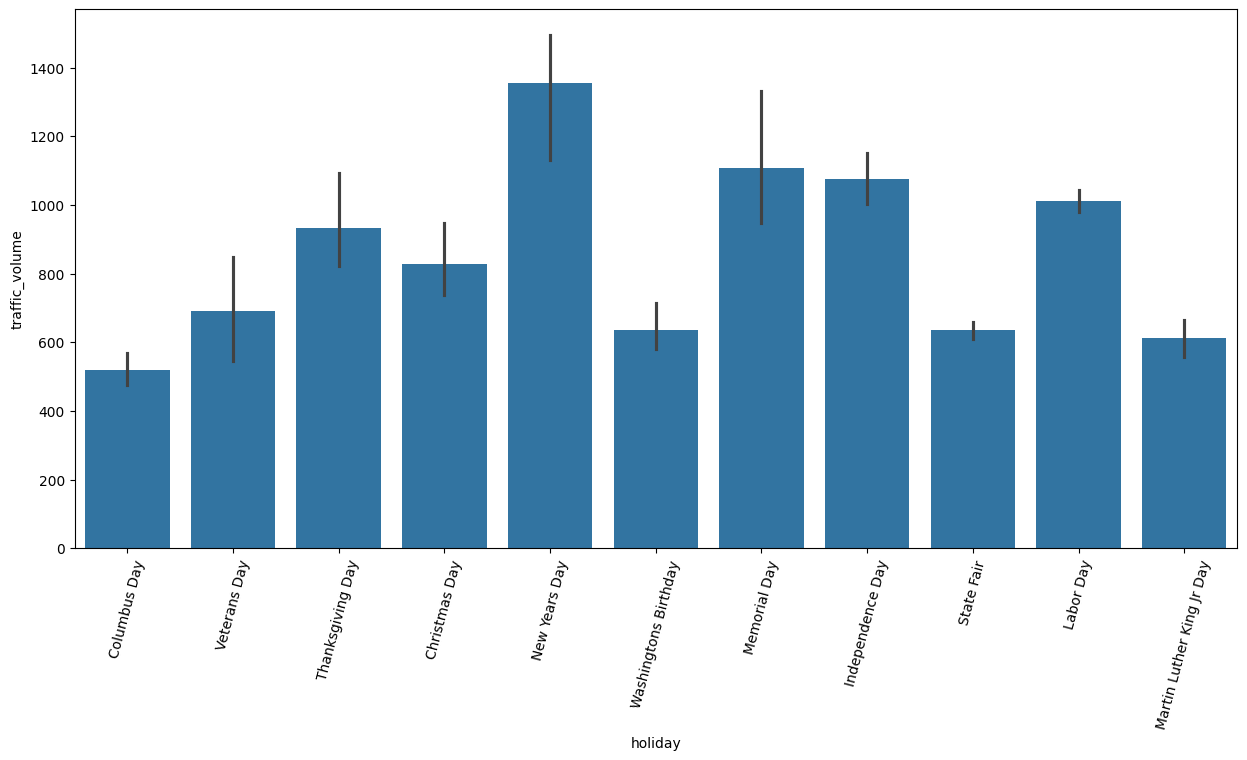

In [162]:
plt.figure(figsize=(15,7))
sns.barplot(
    data = df_no_holiday,
    x = 'holiday',
    y = 'traffic_volume',
    #hue = 'day'
)

plt.xticks(rotation=75)

In [163]:
df_25s = df[((df['month'] == 10) | (df['month'] == 12)) & (df['day'] == 25)]

In [164]:
df_25s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 586 to 40083
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              268 non-null    object        
 1   temp                 268 non-null    float64       
 2   rain_1h              268 non-null    float64       
 3   snow_1h              268 non-null    float64       
 4   clouds_all           268 non-null    int64         
 5   weather_main         268 non-null    object        
 6   weather_description  268 non-null    object        
 7   date_time            268 non-null    datetime64[ns]
 8   traffic_volume       268 non-null    int64         
 9   year                 268 non-null    int32         
 10  month                268 non-null    int32         
 11  day                  268 non-null    int32         
 12  hour                 268 non-null    int32         
dtypes: datetime64[ns](1), float64(3), in

In [165]:
#This showed that the holidays are not all labelled correctly; see 25/12 not all labelled as christmas.
df_25s.head(50)

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
586      No Holiday  287.81      0.0      0.0          90         Mist   
587      No Holiday  287.29      0.0      0.0          75         Mist   
588      No Holiday  287.23      0.0      0.0          90         Mist   
589      No Holiday  286.44      0.0      0.0          90         Mist   
590      No Holiday  285.32      0.0      0.0          90         Mist   
591      No Holiday  285.32      0.0      0.0          90          Fog   
592      No Holiday  285.43      0.0      0.0          90         Mist   
593      No Holiday  285.53      0.0      0.0          75         Mist   
594      No Holiday  285.20      0.0      0.0          90         Mist   
595      No Holiday  285.20      0.0      0.0          90          Fog   
596      No Holiday  285.02      0.0      0.0          90         Mist   
597      No Holiday  286.43      0.0      0.0          90         Mist   
598      No Holiday  287.36      0.0      0.0          90         Mist   
599      No Holiday  287.60      0.0      0.0          90         Mist   
600      No Holiday  287.29      0.0      0.0          90       Clouds   
601      No Holiday  286.41      0.0      0.0          90         Rain   
602      No Holiday  286.41      0.0      0.0          90         Mist   
603      No Holiday  286.41      0.0      0.0          90      Drizzle   
604      No Holiday  286.41      0.0      0.0          90      Drizzle   
605      No Holiday  285.80      0.0      0.0          90      Drizzle   
606      No Holiday  285.80      0.0      0.0          90         Mist   
607      No Holiday  285.80      0.0      0.0          90         Rain   
608      No Holiday  285.80      0.0      0.0          90      Drizzle   
609      No Holiday  285.80      0.0      0.0          90         Rain   
610      No Holiday  285.29      0.0      0.0          90         Rain   
611      No Holiday  285.29      0.0      0.0          90         Mist   
612      No Holiday  285.29      0.0      0.0          90      Drizzle   
613      No Holiday  284.77      0.0      0.0          90         Rain   
614      No Holiday  284.77      0.0      0.0          90         Mist   
615      No Holiday  284.77      0.0      0.0          90         Rain   
616      No Holiday  284.29      0.0      0.0          90      Drizzle   
617      No Holiday  284.29      0.0      0.0          90         Mist   
618      No Holiday  284.29      0.0      0.0          90         Rain   
619      No Holiday  284.29      0.0      0.0          90         Rain   
620      No Holiday  283.79      0.0      0.0          90      Drizzle   
621      No Holiday  283.79      0.0      0.0          90         Mist   
622      No Holiday  283.79      0.0      0.0          90         Rain   
623      No Holiday  283.44      0.0      0.0          90         Rain   
624      No Holiday  283.44      0.0      0.0          90         Mist   
625      No Holiday  283.44      0.0      0.0          90      Drizzle   
626      No Holiday  283.22      0.0      0.0          90         Rain   
627      No Holiday  283.22      0.0      0.0          90         Mist   
628      No Holiday  283.22      0.0      0.0          90      Drizzle   
629      No Holiday  282.82      0.0      0.0          90       Clouds   
630      No Holiday  282.13      0.0      0.0          90       Clouds   
2360  Christmas Day  264.40      0.0      0.0          90       Clouds   
2361     No Holiday  264.52      0.0      0.0          90       Clouds   
2362     No Holiday  264.42      0.0      0.0          90       Clouds   
2363     No Holiday  264.31      0.0      0.0          90       Clouds   
2364     No Holiday  264.31      0.0      0.0          90         Snow   

          weather_description           date_time  traffic_volume  year  \
586                      mist 2012-10-25 00:00:00             578  2012   
587                      mist 2012-10-25 01:00:00             354  2012   
588         

In [166]:
df_25s.groupby(df_25s['month']).mean(numeric_only=True)

temp   rain_1h  snow_1h  clouds_all  traffic_volume         year  \
month                                                                           
10     282.606010  0.000000      0.0   68.504854     3908.553398  2014.194175   
12     267.014606  0.009152      0.0   71.272727     1575.387879  2014.854545   

        day       hour  
month                   
10     25.0  12.902913  
12     25.0  11.739394

<Axes: xlabel='month', ylabel='traffic_volume'>

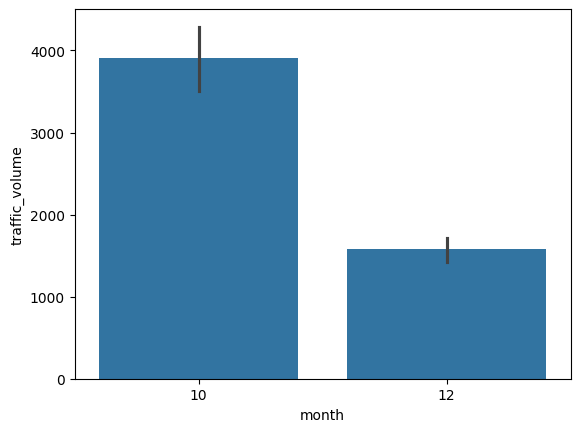

In [167]:
sns.barplot(
    data = df_25s,
    x = 'month',
    y = 'traffic_volume'
)

##6. Temperature most associated with Busiest and Least Busiest dates of year?

In [168]:
df_25s.groupby(df_25s['month']).mean(numeric_only=True)

temp   rain_1h  snow_1h  clouds_all  traffic_volume         year  \
month                                                                           
10     282.606010  0.000000      0.0   68.504854     3908.553398  2014.194175   
12     267.014606  0.009152      0.0   71.272727     1575.387879  2014.854545   

        day       hour  
month                   
10     25.0  12.902913  
12     25.0  11.739394

<Axes: xlabel='month', ylabel='temp'>

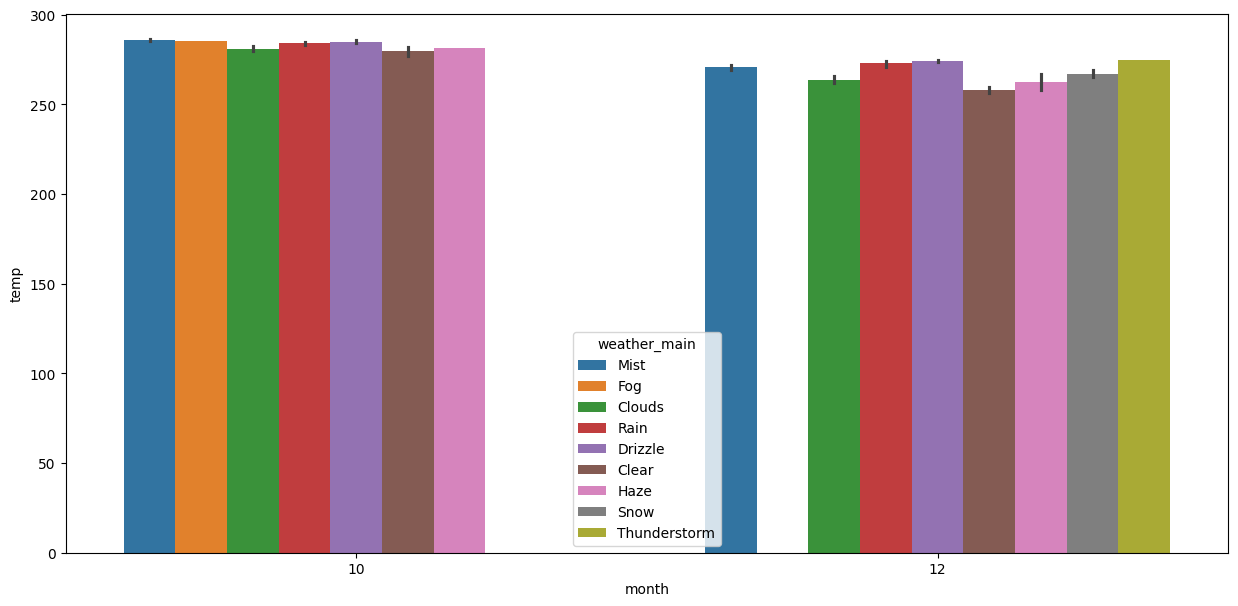

In [169]:
plt.figure(figsize=(15,7))
sns.barplot(
    data = df_25s,
    x = 'month',
    y = 'temp',
    hue = 'weather_main'
)

##7. Busiest and Least Busiest day of the week?

In [170]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'year', 'month',
       'day', 'hour'],
      dtype='object')

In [171]:
df['week'] = df['date_time'].dt.isocalendar().week
df.groupby(df['week']).agg({'traffic_volume':'mean'}).style.highlight_min(color='blue', axis=0).highlight_max(color = 'red', axis = 0)

In [172]:
df['day_of_week'] = df['date_time'].dt.day_name()
df.groupby(df['day_of_week']).agg({'traffic_volume':'mean'}).style.highlight_min(color='blue', axis=0).highlight_max(color = 'red', axis = 0)

##8. Any good predictor of traffic volume?

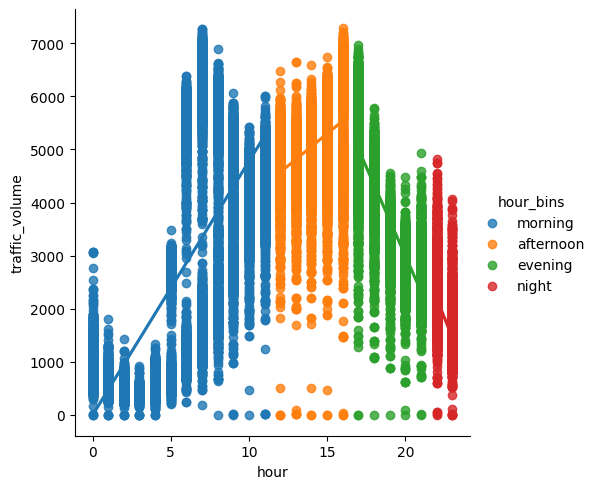

In [173]:
df['hour_bins'] = df['hour'].apply(lambda x: 'morning' if x < 12 else 'afternoon' if x < 17 else 'evening' if x < 22 else 'night')

sns.lmplot(
    data = df,
    x = 'hour',
    y = 'traffic_volume',
    hue = 'hour_bins'
)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


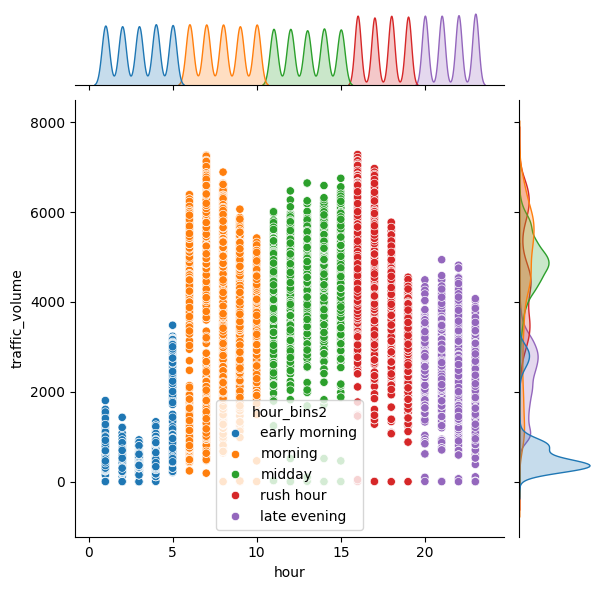

In [175]:
df['hour_bins2'] = pd.cut(df['hour'], bins = [0,5,10,15,19,23], labels = ['early morning', 'morning', 'midday', 'rush hour', 'late evening'])

sns.jointplot(
    data = df,
    x = 'hour',
    y = 'traffic_volume',
    hue = 'hour_bins2'
)

##Bonus: Is weather Condition correlated to traffic volume?